In [1]:
import tensorflow as tf

In [2]:


tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/gdrive')
# drive.mount('gdrive/') # for Ronaldlee 

Mounted at /gdrive


In [4]:

%cd /gdrive/MyDrive/2023_DSKUS/EDA/datasets/

/gdrive/MyDrive/2023_DSKUS/EDA/datasets


In [5]:
%pwd

'/gdrive/MyDrive/2023_DSKUS/EDA/datasets'

In [6]:
# load all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Data processing

In [9]:
# focused countries

COUNTRIES = """ARG
BOL
BRA
BRN
CHL
COL
CRI
CUB
DOM
ECU
GTM
GUY
HND
HTI
IDN
KHM
LAO
MEX
MMR
MYS
NIC
PAN
PER
PHL
PRI
PRY
SGP
SLV
SUR
THA
TLS
URY
VEN
VNM""".split("\n")

In [96]:
COUNTRIES

['ARG',
 'BOL',
 'BRA',
 'BRN',
 'CHL',
 'COL',
 'CRI',
 'CUB',
 'DOM',
 'ECU',
 'GTM',
 'GUY',
 'HND',
 'HTI',
 'IDN',
 'KHM',
 'LAO',
 'MEX',
 'MMR',
 'MYS',
 'NIC',
 'PAN',
 'PER',
 'PHL',
 'PRI',
 'PRY',
 'SGP',
 'SLV',
 'SUR',
 'THA',
 'TLS',
 'URY',
 'VEN',
 'VNM']

In [97]:
latin_countries = ['ARG', 'BOL', 'BRA', 'BRN', 'CHL', 'COL', 'CRI', 'CUB', 'DOM', 'ECU', 'GTM', 'GUY', 'HND', 'HTI', 'MEX', 'NIC', 'PAN', 'PER', 'PRI', 'PRY', 'SLV', 'SUR', 'URY', 'VEN']
sea_countries = ['IDN','KHM','LAO','MMR','MYS','PHL','SGP','THA','TLS','VNM']


In [11]:
def readCsvFile(filepath, encoding = "utf-8"):
    """
        Function to read csv file
        args:
            filepath : path to csv file
        return:
            df : dataframe
    """
    
    df = pd.read_csv(filepath, encoding = encoding)
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    
    df.drop(df.columns[-1], inplace=True, axis = 1)
    
    return df

In [12]:
# read world record indicators
raw_indicators = readCsvFile("WorldDevelopmentIndicators_new.csv", encoding = 'utf8') 

In [13]:
# read data file
raw_us_aid = readCsvFile('us_foreign_aid_complete.csv')


In [14]:
# fix year column
raw_us_aid['fiscal_year'] = np.where(raw_us_aid.fiscal_year=="1976tq", "1976", raw_us_aid.fiscal_year)

In [15]:
raw_indicators.head(2)

country_name country_code  \
0    Argentina          ARG   
1    Argentina          ARG   

                                      indicator_name     indicator_code  1960  \
0  Intentional homicides, female (per 100,000 fem...  VC.IHR.PSRC.FE.P5   NaN   
1           Battle-related deaths (number of people)        VC.BTL.DETH   NaN   

   1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   

   1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2009  2010  2011  2012  2013  2014      2015  2016      2017      2018  \
0   NaN   NaN   NaN   NaN   NaN   NaN  1.770783   NaN  1.833785  1.765758   
1   NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN       NaN   

       2019      2020      2021  
0  1.805937  1.631556  1.347217  
1       NaN       NaN       NaN

In [16]:
# list of indicators
raw_indicators.indicator_name.unique()

array(['Intentional homicides, female (per 100,000 female)',
       'Battle-related deaths (number of people)',
       'Voice and Accountability: Percentile Rank', ...,
       'Permanent cropland (% of land area)', 'Arable land (hectares)',
       'Fertilizer consumption (% of fertilizer production)'],
      dtype=object)

In [17]:
print("Total indicators: \n")
raw_indicators.indicator_name.nunique()

Total indicators: 



1478

In [18]:
# filter for focused countries

indicators_df = raw_indicators.query("country_code == @COUNTRIES")
foreign_aid_df = raw_us_aid.query("country_code == @COUNTRIES")

In [19]:
indicators_df.country_code.nunique(), foreign_aid_df.country_code.nunique()

(34, 33)

In [20]:
# transform dataframe into proper format

transformd_df = indicators_df.melt(id_vars = ['country_name', 'country_code', 'indicator_name', 'indicator_code'], var_name = "year", value_name = "metric_value")

In [21]:
transformd_df.head()

country_name country_code  \
0    Argentina          ARG   
1    Argentina          ARG   
2    Argentina          ARG   
3    Argentina          ARG   
4    Argentina          ARG   

                                      indicator_name     indicator_code  year  \
0  Intentional homicides, female (per 100,000 fem...  VC.IHR.PSRC.FE.P5  1960   
1           Battle-related deaths (number of people)        VC.BTL.DETH  1960   
2          Voice and Accountability: Percentile Rank         VA.PER.RNK  1960   
3  Transport services (% of commercial service ex...  TX.VAL.TRAN.ZS.WT  1960   
4  Computer, communications and other services (%...  TX.VAL.OTHR.ZS.WT  1960   

   metric_value  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [22]:
# consider only recent data

transformd_df = transformd_df[transformd_df.year >= '2000']

In [23]:
transformd_df.sample(5)

country_name country_code  \
2643653    Nicaragua          NIC   
2865230    Argentina          ARG   
2240565     Malaysia          MYS   
2497320  Philippines          PHL   
2070242   Costa Rica          CRI   

                                            indicator_name  \
2643653  Educational attainment, at least completed sho...   
2865230  Net bilateral aid flows from DAC donors, Unite...   
2240565  Losses due to theft and vandalism (% of annual...   
2497320                  Number of deaths ages 20-24 years   
2070242               Gross domestic savings (current US$)   

               indicator_code  year  metric_value  
2643653  SE.TER.CUAT.ST.FE.ZS  2012           NaN  
2865230        DC.DAC.USAL.CD  2017  1.320000e+06  
2240565        IC.FRM.CRIM.ZS  2004           NaN  
2497320           SH.DTH.2024  2009  1.054900e+04  
2070242        NY.GDS.TOTL.CD  2001  3.239948e+09

In [24]:
# data range

transformd_df.year.min(), transformd_df.year.max()

('2000', '2021')

In [25]:
transformd_df[transformd_df.metric_value.isna()]

country_name country_code  \
2010080    Argentina          ARG   
2010081    Argentina          ARG   
2010106    Argentina          ARG   
2010108    Argentina          ARG   
2010109    Argentina          ARG   
...              ...          ...   
3115619      Vietnam          VNM   
3115620      Vietnam          VNM   
3115621      Vietnam          VNM   
3115622      Vietnam          VNM   
3115623      Vietnam          VNM   

                                            indicator_name     indicator_code  \
2010080  Intentional homicides, female (per 100,000 fem...  VC.IHR.PSRC.FE.P5   
2010081           Battle-related deaths (number of people)        VC.BTL.DETH   
2010106  Unmet need for contraception (% of married wom...        SP.UWT.TFRT   
2010108             Completeness of birth registration (%)     SP.REG.BRTH.ZS   
2010109     Completeness of birth registration, female (%)  SP.REG.BRTH.FE.ZS   
...                                                    ...                ...   
3115619  Agricultural irrigated land (% of total agricu...  AG.LND.IRIG.AG.ZS   
3115620  Urban land area where elevation is below 5 met...  AG.LND.EL5M.UR.ZS   
3115621                Permanent cropland (% of land area)     AG.LND.CROP.ZS   
3115622                             Arable land (hectares)     AG.LND.ARBL.HA   
3115623  Fertilizer consumption (% of fertilizer produc...  AG.CON.FERT.PT.ZS   

         year  metric_value  
2010080  2000           NaN  
2010081  2000           NaN  
2010106  2000           NaN  
2010108  2000           NaN  
2010109  2000           NaN  
...       ...           ...  
3115619  2021           NaN  
3115620  2021           NaN  
3115621  2021           NaN  
3115622  2021           NaN  
3115623  2021           NaN  

[406253 rows x 6 columns]

In [26]:
raw_indicators.loc[:, ~raw_indicators.isnull().all()].head(2)

country_name country_code  \
0    Argentina          ARG   
1    Argentina          ARG   

                                      indicator_name     indicator_code  1960  \
0  Intentional homicides, female (per 100,000 fem...  VC.IHR.PSRC.FE.P5   NaN   
1           Battle-related deaths (number of people)        VC.BTL.DETH   NaN   

   1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   

   1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2009  2010  2011  2012  2013  2014      2015  2016      2017      2018  \
0   NaN   NaN   NaN   NaN   NaN   NaN  1.770783   NaN  1.833785  1.765758   
1   NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN       NaN   

       2019      2020      2021  
0  1.805937  1.631556  1.347217  
1       NaN       NaN       NaN

## Drop indicator strategy


1.   Drop indicators with all missing
2.   Drop highly correlated features



In [27]:
transformd_df.head(5)

country_name country_code  \
2010080    Argentina          ARG   
2010081    Argentina          ARG   
2010082    Argentina          ARG   
2010083    Argentina          ARG   
2010084    Argentina          ARG   

                                            indicator_name     indicator_code  \
2010080  Intentional homicides, female (per 100,000 fem...  VC.IHR.PSRC.FE.P5   
2010081           Battle-related deaths (number of people)        VC.BTL.DETH   
2010082          Voice and Accountability: Percentile Rank         VA.PER.RNK   
2010083  Transport services (% of commercial service ex...  TX.VAL.TRAN.ZS.WT   
2010084  Computer, communications and other services (%...  TX.VAL.OTHR.ZS.WT   

         year  metric_value  
2010080  2000           NaN  
2010081  2000           NaN  
2010082  2000     61.194031  
2010083  2000     24.913914  
2010084  2000     13.427948

In [28]:
'GDP%' in transformd_df.indicator_name.unique()

False

In [29]:
'GDP per capita growth (annual %)' in transformd_df.indicator_name.unique()

True

In [30]:
drop_df_dtl = transformd_df.pivot_table("metric_value", ['year', 'country_name', 'country_code'], 'indicator_name')

In [32]:
drop_df_dtl.shape


(748, 1468)

In [34]:
# feature null percentages

dd = pd.DataFrame(drop_df_dtl.isna().sum()/drop_df_dtl.shape[0], columns=['null_perc']).reset_index()

In [35]:
dd

indicator_name  null_perc
0     ARI treatment (% of children under 5 taken to ...   0.860963
1     Access to clean fuels and technologies for coo...   0.073529
2     Access to clean fuels and technologies for coo...   0.073529
3     Access to clean fuels and technologies for coo...   0.073529
4               Access to electricity (% of population)   0.045455
...                                                 ...        ...
1463  Women who believe a husband is justified in be...   0.951872
1464  Women who were first married by age 15 (% of w...   0.914439
1465  Women who were first married by age 18 (% of w...   0.914439
1466  Women's share of population ages 15+ living wi...   0.029412
1467  Young people (ages 15-24) newly infected with HIV   0.147059

[1468 rows x 2 columns]

<Axes: title={'center': 'Null Value Percentage'}, xlabel='null_perc', ylabel='Count'>

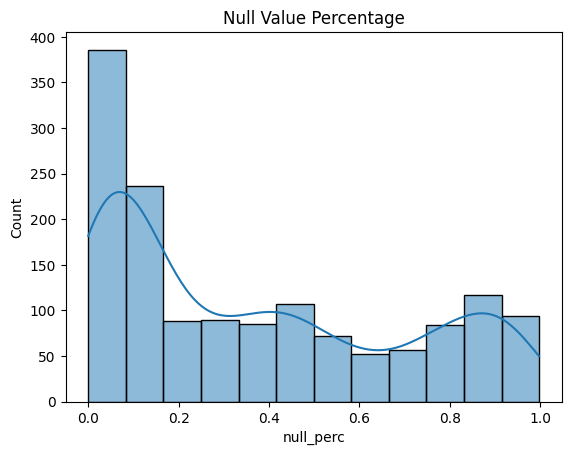

In [41]:
import seaborn as sns
plt.title("Null Value Percentage")
sns.histplot(x=dd.null_perc,
                kde=True, ## 밀도 함수 곡선 추가
                #   stat='percent', ## y값 계산 방식 count
                  cumulative=False,) ## True인 경우 누적 분포 형태로 그림)
# dd.null_perc.hist()

In [42]:
# list of indicators with no nulls
no_null_indicators = dd[dd.null_perc==0.00]['indicator_name'].unique().tolist()

In [43]:
no_null_indicators

['Adjusted savings: education expenditure (% of GNI)',
 'Adjusted savings: mineral depletion (current US$)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Aquaculture production (metric tons)',
 'Birth rate, crude (per 1,000 people)',
 'Capture fisheries production (metric tons)',
 'Crop production index (2014-2016 = 100)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Food production index (2014-2016 = 100)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)',
 'Livestock production index (2014-2016 = 100)',
 'Lower secondary school starting age (years)',
 'Mortality rate, adult, female (per 1,000 female adults)',
 'Mortality rate, adult, male (per 1,000 male adults)',
 'Net migration',
 'Population ages 0-14 (% of total population)',

In [44]:
no_null_indicators.append('GDP per capita growth (annual %)')
no_null_indicators.append('GDP per capita (current US$)')

In [45]:
'GDP per capita growth (annual %)' in no_null_indicators

True

In [46]:
no_null_indicators[-1]

'GDP per capita (current US$)'

In [47]:
# df with no null values
no_null_df = drop_df_dtl[no_null_indicators].reset_index()

In [48]:
no_null_df.head()

indicator_name  year       country_name country_code  \
0               2000          Argentina          ARG   
1               2000            Bolivia          BOL   
2               2000             Brazil          BRA   
3               2000  Brunei Darussalam          BRN   
4               2000           Cambodia          KHM   

indicator_name  Adjusted savings: education expenditure (% of GNI)  \
0                                                            4.60    
1                                                            4.81    
2                                                            3.88    
3                                                            3.64    
4                                                            1.55    

indicator_name  Adjusted savings: mineral depletion (current US$)  \
0                                                    3.365481e+06   
1                                                    1.716644e+07   
2                                                    1.015892e+09   
3                                                    0.000000e+00   
4                                                    0.000000e+00   

indicator_name  Age dependency ratio (% of working-age population)  \
0                                                       61.087972    
1                                                       77.127699    
2                                                       54.649851    
3                                                       56.321419    
4                                                       76.199701    

indicator_name  Age dependency ratio, old (% of working-age population)  \
0                                                       15.693039         
1                                                        9.020826         
2                                                        8.511592         
3                                                        4.477214         
4                                                        5.396632         

indicator_name  Age dependency ratio, young (% of working-age population)  \
0                                                       45.394933           
1                                                       68.106874           
2                                                       46.138259           
3                                                       51.844206           
4                                                       70.803069           

indicator_name  Aquaculture production (metric tons)  \
0                                             1784.0   
1                                              405.0   
2                                           172450.0   
3                                              113.0   
4                                            14430.0   

indicator_name  Birth rate, crude (per 1,000 people)  \
0                                             19.366   
1                                             29.717   
2                                             19.841   
3                                             19.012   
4                                             27.562   

indicator_name  Capture fisheries production (metric tons)  \
0                                                921800.00   
1                                                  6106.00   
2                                                666846.00   
3                                                  2487.00   
4                                                281619.51   

indicator_name  Crop production index (2014-2016 = 100)  \
0                                                 60.94   
1                                                 56.40   
2                                                 54.08   
3                                                 83.96   
4                                                 35.99   

indicator_name  Death rate, crude (per 1,000 people)  \
0                                 

In [49]:
drop_df_dtl.head()

indicator_name                       ARI treatment (% of children under 5 taken to a health provider)  \
year country_name      country_code                                                                     
2000 Argentina         ARG                                                         NaN                  
     Bolivia           BOL                                                        54.0                  
     Brazil            BRA                                                         NaN                  
     Brunei Darussalam BRN                                                         NaN                  
     Cambodia          KHM                                                        37.0                  

indicator_name                       Access to clean fuels and technologies for cooking (% of population)  \
year country_name      country_code                                                                         
2000 Argentina         ARG                                                        95.0                      
     Bolivia           BOL                                                        62.9                      
     Brazil            BRA                                                        89.0                      
     Brunei Darussalam BRN                                                       100.0                      
     Cambodia          KHM                                                         3.6                      

indicator_name                       Access to clean fuels and technologies for cooking, rural (% of rural population)  \
year country_name      country_code                                                                                      
2000 Argentina         ARG                                                        70.8                                   
     Bolivia           BOL                                                        18.4                                   
     Brazil            BRA                                                        55.1                                   
     Brunei Darussalam BRN                                                       100.0                                   
     Cambodia          KHM                                                         1.2                                   

indicator_name                       Access to clean fuels and technologies for cooking, urban (% of urban population)  \
year country_name      country_code                                                                                      
2000 Argentina         ARG                                                        98.3                                   
     Bolivia           BOL                                                        92.3                                   
     Brazil            BRA                                                        97.0                                   
     Brunei Darussalam BRN                                                       100.0                                   
     Cambodia          KHM                                                        15.4                                   

indicator_name                       Access to electricity (% of population)  \
year country_name      country_code                                            
2000 Argentina         ARG                                         95.783287   
     Bolivia           BOL                                         69.963043   
     Brazil            BRA                                         94.391716   
     Brunei Darussalam BRN                                        100.000000   
     Cambodia          KHM                                         16.600000   

indicator_name                       Access to electricity, rural (% of rural population)  \
year country_name      country_code                                                         
2000 Argentina         ARG                 

In [50]:
dd[dd.indicator_name=='GDP per capita (current US$)']

indicator_name  null_perc
479  GDP per capita (current US$)   0.010695

In [51]:
drop_df_dtl['GDP per capita (current US$)'].isna().sum()/drop_df_dtl.shape[0]

0.0106951871657754

# Correlation analysis

In [52]:
no_null_df.head()

indicator_name  year       country_name country_code  \
0               2000          Argentina          ARG   
1               2000            Bolivia          BOL   
2               2000             Brazil          BRA   
3               2000  Brunei Darussalam          BRN   
4               2000           Cambodia          KHM   

indicator_name  Adjusted savings: education expenditure (% of GNI)  \
0                                                            4.60    
1                                                            4.81    
2                                                            3.88    
3                                                            3.64    
4                                                            1.55    

indicator_name  Adjusted savings: mineral depletion (current US$)  \
0                                                    3.365481e+06   
1                                                    1.716644e+07   
2                                                    1.015892e+09   
3                                                    0.000000e+00   
4                                                    0.000000e+00   

indicator_name  Age dependency ratio (% of working-age population)  \
0                                                       61.087972    
1                                                       77.127699    
2                                                       54.649851    
3                                                       56.321419    
4                                                       76.199701    

indicator_name  Age dependency ratio, old (% of working-age population)  \
0                                                       15.693039         
1                                                        9.020826         
2                                                        8.511592         
3                                                        4.477214         
4                                                        5.396632         

indicator_name  Age dependency ratio, young (% of working-age population)  \
0                                                       45.394933           
1                                                       68.106874           
2                                                       46.138259           
3                                                       51.844206           
4                                                       70.803069           

indicator_name  Aquaculture production (metric tons)  \
0                                             1784.0   
1                                              405.0   
2                                           172450.0   
3                                              113.0   
4                                            14430.0   

indicator_name  Birth rate, crude (per 1,000 people)  \
0                                             19.366   
1                                             29.717   
2                                             19.841   
3                                             19.012   
4                                             27.562   

indicator_name  Capture fisheries production (metric tons)  \
0                                                921800.00   
1                                                  6106.00   
2                                                666846.00   
3                                                  2487.00   
4                                                281619.51   

indicator_name  Crop production index (2014-2016 = 100)  \
0                                                 60.94   
1                                                 56.40   
2                                                 54.08   
3                                                 83.96   
4                                                 35.99   

indicator_name  Death rate, crude (per 1,000 people)  \
0                                 

In [53]:
'GDP per capita growth (annual %)' in raw_indicators.indicator_name.unique()

True

In [54]:
no_null_df.iloc[:, 3:]

indicator_name  Adjusted savings: education expenditure (% of GNI)  \
0                                                        4.600000    
1                                                        4.810000    
2                                                        3.880000    
3                                                        3.640000    
4                                                        1.550000    
..                                                            ...    
743                                                      3.897312    
744                                                      3.187621    
745                                                      4.629604    
746                                                      6.540000    
747                                                      4.571567    

indicator_name  Adjusted savings: mineral depletion (current US$)  \
0                                                    3.365481e+06   
1                                                    1.716644e+07   
2                                                    1.015892e+09   
3                                                    0.000000e+00   
4                                                    0.000000e+00   
..                                                            ...   
743                                                  0.000000e+00   
744                                                  0.000000e+00   
745                                                  5.605342e+06   
746                                                  0.000000e+00   
747                                                  1.407430e+08   

indicator_name  Age dependency ratio (% of working-age population)  \
0                                                       61.087972    
1                                                       77.127699    
2                                                       54.649851    
3                                                       56.321419    
4                                                       76.199701    
..                                                            ...    
743                                                     43.496632    
744                                                     68.291946    
745                                                     53.598555    
746                                                     57.502306    
747                                                     45.556773    

indicator_name  Age dependency ratio, old (% of working-age population)  \
0                                                       15.693039         
1                                                        9.020826         
2                                                        8.511592         
3                                                        4.477214         
4                                                        5.396632         
..                                                            ...         
743                                                     20.823624         
744                                                      8.894894         
745                                                     23.744059         
746                                                     13.132760         
747                                                     12.740779         

indicator_name  Age dependency ratio, young (% of working-age population)  \
0                                                       45.394933           
1                                                       68.106874           
2                                                       46.138259           
3                                                       51.844206           
4                                                       70.803069           
..                                                            ...           
743                                              

In [55]:
# select numeric values only

num_df = no_null_df.iloc[:, 3:]

In [56]:
corr = num_df.corr()
# sns.heatmap(corr)

In [57]:
num_df.shape

(748, 92)

In [58]:
# get absolute score for all features

corr = corr.abs()

In [59]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [60]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [61]:
len(to_drop)

73

In [62]:
num_df.head()

indicator_name  Adjusted savings: education expenditure (% of GNI)  \
0                                                            4.60    
1                                                            4.81    
2                                                            3.88    
3                                                            3.64    
4                                                            1.55    

indicator_name  Adjusted savings: mineral depletion (current US$)  \
0                                                    3.365481e+06   
1                                                    1.716644e+07   
2                                                    1.015892e+09   
3                                                    0.000000e+00   
4                                                    0.000000e+00   

indicator_name  Age dependency ratio (% of working-age population)  \
0                                                       61.087972    
1                                                       77.127699    
2                                                       54.649851    
3                                                       56.321419    
4                                                       76.199701    

indicator_name  Age dependency ratio, old (% of working-age population)  \
0                                                       15.693039         
1                                                        9.020826         
2                                                        8.511592         
3                                                        4.477214         
4                                                        5.396632         

indicator_name  Age dependency ratio, young (% of working-age population)  \
0                                                       45.394933           
1                                                       68.106874           
2                                                       46.138259           
3                                                       51.844206           
4                                                       70.803069           

indicator_name  Aquaculture production (metric tons)  \
0                                             1784.0   
1                                              405.0   
2                                           172450.0   
3                                              113.0   
4                                            14430.0   

indicator_name  Birth rate, crude (per 1,000 people)  \
0                                             19.366   
1                                             29.717   
2                                             19.841   
3                                             19.012   
4                                             27.562   

indicator_name  Capture fisheries production (metric tons)  \
0                                                921800.00   
1                                                  6106.00   
2                                                666846.00   
3                                                  2487.00   
4                                                281619.51   

indicator_name  Crop production index (2014-2016 = 100)  \
0                                                 60.94   
1                                                 56.40   
2                                                 54.08   
3                                                 83.96   
4                                                 35.99   

indicator_name  Death rate, crude (per 1,000 people)  \
0                                              7.600   
1                                              9.826   
2                                              6.399   
3                                              3.331   
4                                              9.273   

indicator_name  Fertility rate, total (births per woman)  \
0                             

In [63]:
to_drop

['Age dependency ratio, young (% of working-age population)',
 'Birth rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Food production index (2014-2016 = 100)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)',
 'Livestock production index (2014-2016 = 100)',
 'Mortality rate, adult, female (per 1,000 female adults)',
 'Mortality rate, adult, male (per 1,000 male adults)',
 'Population ages 0-14 (% of total population)',
 'Population ages 0-14, female (% of female population)',
 'Population ages 0-14, male',
 'Population ages 0-14, male (% of male population)',
 'Population ages 0-14, total',
 'Population ages 00-04, female (% of female population)',
 'Population ages 00-04, male (% of male population)',
 'Population ages 05-09, female (% of female population)',
 'Population ages 05-09, male (% of male population)',
 'Population ages 10-14, female (% of female population)',


In [64]:
# remove target variable from drop list

# to_drop.remove('GDP per capita growth (annual %)')

In [65]:
len(to_drop)

73

In [66]:
# drop highly correlated features
num_df.drop(to_drop, axis=1, inplace=True)

<Axes: xlabel='indicator_name', ylabel='indicator_name'>

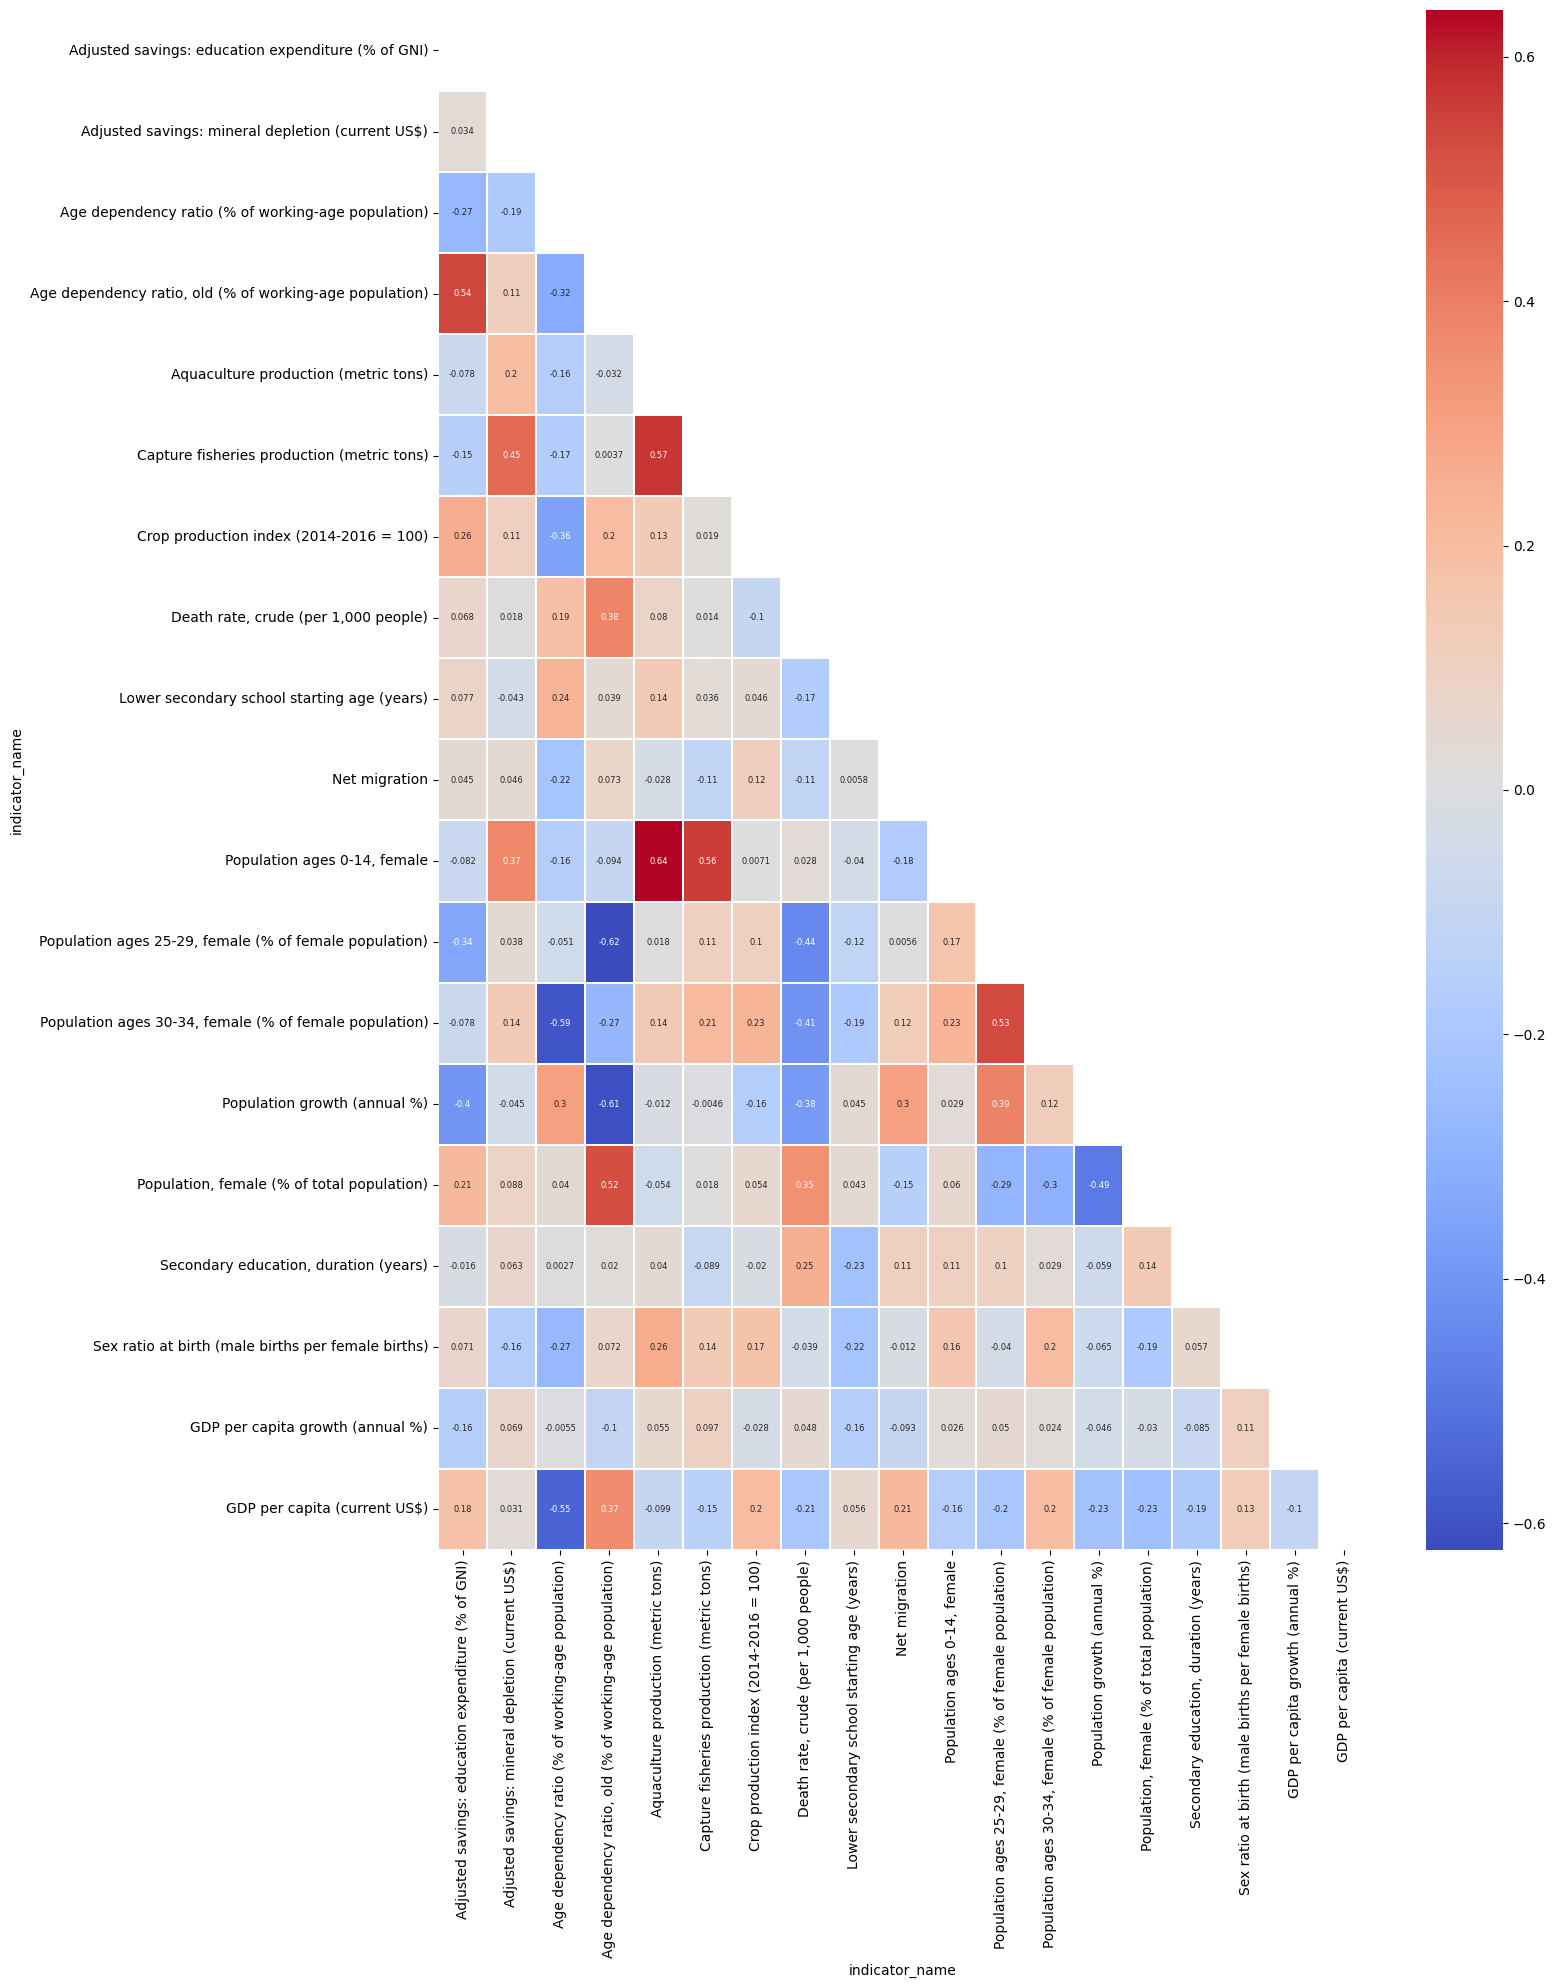

In [67]:
plt.figure(figsize=(15, 20))
corr = num_df.corr()
trimask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap="coolwarm", mask=trimask, linewidths=.1, annot=True, annot_kws={"size": 6})

In [68]:
num_df.shape

(748, 19)

In [69]:
no_null_df.drop(to_drop, axis=1, inplace = True)

# Transform US AID for this data


There are 2 types of foreign aid given to countries.


*   Disbursements:Disbursements represent the actual funds that have been paid out or distributed to the recipient countries or organizations as part of the foreign assistance program. 
*   Obligations: Obligations, on the other hand, refer to the commitments made by the U.S. government to provide financial assistance to specific countries or organizations.

For now, we will keep both the features/$$ amount in 2 separate columns



In [70]:
foreign_aid_df.head()

country_id country_code country_name  region_id         region_name  \
107687          32          ARG    Argentina          6  Western Hemisphere   
107688          32          ARG    Argentina          6  Western Hemisphere   
107689          32          ARG    Argentina          6  Western Hemisphere   
107690          32          ARG    Argentina          6  Western Hemisphere   
107691          32          ARG    Argentina          6  Western Hemisphere   

        income_group_id            income_group_name income_group_acronym  \
107687              3.0  Upper Middle Income Country                 UMIC   
107688              3.0  Upper Middle Income Country                 UMIC   
107689              3.0  Upper Middle Income Country                 UMIC   
107690              3.0  Upper Middle Income Country                 UMIC   
107691              3.0  Upper Middle Income Country                 UMIC   

        managing_agency_id managing_agency_acronym  \
107687                   1                   USAID   
107688                   1                   USAID   
107689                   1                   USAID   
107690                   1                   USAID   
107691                   1                   USAID   

                             managing_agency_name  \
107687  U.S. Agency for International Development   
107688  U.S. Agency for International Development   
107689  U.S. Agency for International Development   
107690  U.S. Agency for International Development   
107691  U.S. Agency for International Development   

        managing_sub-agency_or_bureau_id  \
107687                                23   
107688                                23   
107689                                23   
107690                                23   
107691                               999   

       managing_sub-agency_or_bureau_acronym  \
107687                                    EE   
107688                                    EE   
107689                                    EE   
107690                                    EE   
107691                                   NaN   

       managing_sub-agency_or_bureau_name  implementing_partner_category_id  \
107687      Bureau for Europe and Eurasia                                 1   
107688      Bureau for Europe and Eurasia                                 1   
107689      Bureau for Europe and Eurasia                                 1   
107690      Bureau for Europe and Eurasia                                 1   
107691                     not applicable                                 1   

       implementing_partner_category_name  \
107687                         Government   
107688                         Government   
107689                         Government   
107690                         Government   
107691                         Government   

        implementing_partner_sub-category_id  \
107687                                     1   
107688                                     1   
107689                                     1   
107690                                     1   
107691                                     1   

       implementing_partner_sub-category_name  implementing_partner_id  \
107687             Government - United States                  1000001   
107688             Government - United States                  1000001   
107689             Government - United States                  1000001   
107690             Government - United States                  1000001   
107691             Government - United States                  1999999   

                                implementing_partner_name  \
107687  U.S. Government - U.S. Agency for Internationa...   
107688  U.S. Government - U.S. Agency for Internationa...   
107689  U.S. Government - U.S. Agency for Internationa...   
107690  U.S. Government - U.S. Agency for Internationa...   
107691                            U.S. Government - Other   

        international_cat

In [71]:
# convert year to int

foreign_aid_df.fiscal_year = foreign_aid_df.fiscal_year.astype(int)

In [72]:
# filter dataset for focused types and year

latest_foreign_aid = foreign_aid_df[(foreign_aid_df.fiscal_year>= 2000)]

In [73]:
latest_foreign_aid.head(2)

country_id country_code country_name  region_id         region_name  \
107687          32          ARG    Argentina          6  Western Hemisphere   
107688          32          ARG    Argentina          6  Western Hemisphere   

        income_group_id            income_group_name income_group_acronym  \
107687              3.0  Upper Middle Income Country                 UMIC   
107688              3.0  Upper Middle Income Country                 UMIC   

        managing_agency_id managing_agency_acronym  \
107687                   1                   USAID   
107688                   1                   USAID   

                             managing_agency_name  \
107687  U.S. Agency for International Development   
107688  U.S. Agency for International Development   

        managing_sub-agency_or_bureau_id  \
107687                                23   
107688                                23   

       managing_sub-agency_or_bureau_acronym  \
107687                                    EE   
107688                                    EE   

       managing_sub-agency_or_bureau_name  implementing_partner_category_id  \
107687      Bureau for Europe and Eurasia                                 1   
107688      Bureau for Europe and Eurasia                                 1   

       implementing_partner_category_name  \
107687                         Government   
107688                         Government   

        implementing_partner_sub-category_id  \
107687                                     1   
107688                                     1   

       implementing_partner_sub-category_name  implementing_partner_id  \
107687             Government - United States                  1000001   
107688             Government - United States                  1000001   

                                implementing_partner_name  \
107687  U.S. Government - U.S. Agency for Internationa...   
107688  U.S. Government - U.S. Agency for Internationa...   

        international_category_id international_category_name  \
107687                         10        Administrative Costs   
107688                         10        Administrative Costs   

        international_sector_code international_sector_name  \
107687                        911        Operating Expenses   
107688                        911        Operating Expenses   

        international_purpose_code international_purpose_name  us_category_id  \
107687                       91010         Operating Expenses               8   
107688                       91010         Operating Expenses               8   

       us_category_name  us_sector_id               us_sector_name  \
107687  Program Support            41  Direct Administrative Costs   
107688  Program Support            41  Direct Administrative Costs   

       funding_account_id                               funding_account_name  \
107687            72x1000  Agency for International Development, Operatin...   
107688            72x1000  Agency for International Development, Operatin...   

        funding_agency_id                        funding_agency_name  \
107687                  1  U.S. Agency for International Development   
107688                  1  U.S. Agency for International Development   

       funding_agency_acronym  foreign_assistance_objective_id  \
107687                  USAID                                1   
107688                  USAID                                1   

       foreign_assistance_objective_name  aid_type_group_id  \
107687                          Economic                  6   
107688                          Economic                  6   

         aid_type_group_name  aid_type_id  \
107687  Administrative Costs           17   
107688  Administrative Costs           17   

                                      aid_type_name  activity_id  \
107687  Administrative costs not included elsewhere       121438   
107688  Administrative costs not included elsewhere

In [100]:
latest_foreign_aid[['constant_dollar_amount', 'current_dollar_amount']].describe()

constant_dollar_amount  current_dollar_amount
count            5.682720e+05           5.682720e+05
mean             2.773145e+05           2.414966e+05
std              4.460157e+06           3.627839e+06
min              1.000000e+00           1.000000e+00
25%              1.878000e+03           1.730000e+03
50%              1.496150e+04           1.362000e+04
75%              9.833300e+04           8.878800e+04
max              1.225187e+09           9.679891e+08

<Axes: xlabel='current_dollar_amount'>

<Figure size 1500x600 with 0 Axes>

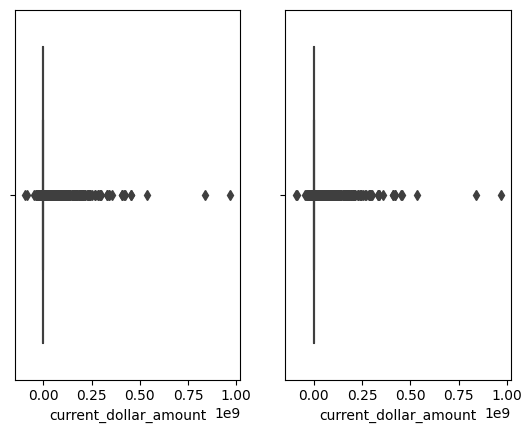

In [75]:
plt.figure(figsize=(15, 6))

f, axes = plt.subplots(1, 2)

sns.boxplot(data = latest_foreign_aid, x = 'current_dollar_amount', orient='v' , ax=axes[0])
sns.boxplot(data = latest_foreign_aid, x = 'current_dollar_amount',  orient='v' , ax=axes[1])

There are negative values in them. We will see how much percent of these values are below 0.

In [76]:
latest_foreign_aid[['constant_dollar_amount', 'current_dollar_amount']].quantile(.11)

constant_dollar_amount    7.0
current_dollar_amount     7.0
Name: 0.11, dtype: float64

In [77]:
latest_foreign_aid[(latest_foreign_aid.constant_dollar_amount<0) & (latest_foreign_aid.current_dollar_amount<0)][['country_name', 'fiscal_year']].value_counts()

country_name  fiscal_year
Colombia      2021           1046
Guatemala     2021            844
Mexico        2021            694
Indonesia     2019            622
Honduras      2021            598
                             ... 
Singapore     2012              1
Bolivia       2023              1
Chile         2014              1
Vietnam       2001              1
Argentina     2002              1
Length: 638, dtype: int64

Only 1 percentile of values are below 0. It's better to drop them from the dataset.

In [78]:
# drop rows with $ amount below 0

latest_foreign_aid = latest_foreign_aid[(latest_foreign_aid.constant_dollar_amount>0) & (latest_foreign_aid.current_dollar_amount>0)]

In [79]:
latest_foreign_aid.head(2)

country_id country_code country_name  region_id         region_name  \
107687          32          ARG    Argentina          6  Western Hemisphere   
107688          32          ARG    Argentina          6  Western Hemisphere   

        income_group_id            income_group_name income_group_acronym  \
107687              3.0  Upper Middle Income Country                 UMIC   
107688              3.0  Upper Middle Income Country                 UMIC   

        managing_agency_id managing_agency_acronym  \
107687                   1                   USAID   
107688                   1                   USAID   

                             managing_agency_name  \
107687  U.S. Agency for International Development   
107688  U.S. Agency for International Development   

        managing_sub-agency_or_bureau_id  \
107687                                23   
107688                                23   

       managing_sub-agency_or_bureau_acronym  \
107687                                    EE   
107688                                    EE   

       managing_sub-agency_or_bureau_name  implementing_partner_category_id  \
107687      Bureau for Europe and Eurasia                                 1   
107688      Bureau for Europe and Eurasia                                 1   

       implementing_partner_category_name  \
107687                         Government   
107688                         Government   

        implementing_partner_sub-category_id  \
107687                                     1   
107688                                     1   

       implementing_partner_sub-category_name  implementing_partner_id  \
107687             Government - United States                  1000001   
107688             Government - United States                  1000001   

                                implementing_partner_name  \
107687  U.S. Government - U.S. Agency for Internationa...   
107688  U.S. Government - U.S. Agency for Internationa...   

        international_category_id international_category_name  \
107687                         10        Administrative Costs   
107688                         10        Administrative Costs   

        international_sector_code international_sector_name  \
107687                        911        Operating Expenses   
107688                        911        Operating Expenses   

        international_purpose_code international_purpose_name  us_category_id  \
107687                       91010         Operating Expenses               8   
107688                       91010         Operating Expenses               8   

       us_category_name  us_sector_id               us_sector_name  \
107687  Program Support            41  Direct Administrative Costs   
107688  Program Support            41  Direct Administrative Costs   

       funding_account_id                               funding_account_name  \
107687            72x1000  Agency for International Development, Operatin...   
107688            72x1000  Agency for International Development, Operatin...   

        funding_agency_id                        funding_agency_name  \
107687                  1  U.S. Agency for International Development   
107688                  1  U.S. Agency for International Development   

       funding_agency_acronym  foreign_assistance_objective_id  \
107687                  USAID                                1   
107688                  USAID                                1   

       foreign_assistance_objective_name  aid_type_group_id  \
107687                          Economic                  6   
107688                          Economic                  6   

         aid_type_group_name  aid_type_id  \
107687  Administrative Costs           17   
107688  Administrative Costs           17   

                                      aid_type_name  activity_id  \
107687  Administrative costs not included elsewhere       121438   
107688  Administrative costs not included elsewhere

In [80]:
# transformation of aid df

aid_transformd_df = latest_foreign_aid.pivot_table(['current_dollar_amount', 'constant_dollar_amount'], ['fiscal_year', 'country_name', 'country_code'], 'transaction_type_name', aggfunc="sum").reset_index()

In [81]:
aid_transformd_df.columns = ["_".join(column) for column in aid_transformd_df.columns]

In [82]:
aid_transformd_df.sample(3)

fiscal_year_ country_name_ country_code_  \
5            2000         Chile           CHL   
1            2000       Bolivia           BOL   
263          2008    Costa Rica           CRI   

     constant_dollar_amount_Disbursements  constant_dollar_amount_Obligations  \
5                                     NaN                           2295354.0   
1                                     NaN                         351920616.0   
263                            10187607.0                          10802162.0   

     current_dollar_amount_Disbursements  current_dollar_amount_Obligations  
5                                    NaN                          1572575.0  
1                                    NaN                        241105038.0  
263                            8439117.0                          8948194.0

In [83]:
aid_transformd_df[aid_transformd_df.isna().any(axis=1)]

fiscal_year_       country_name_ country_code_  \
0            2000           Argentina           ARG   
1            2000             Bolivia           BOL   
2            2000              Brazil           BRA   
3            2000     Burma (Myanmar)           MMR   
4            2000            Cambodia           KHM   
5            2000               Chile           CHL   
6            2000            Colombia           COL   
7            2000          Costa Rica           CRI   
8            2000                Cuba           CUB   
9            2000  Dominican Republic           DOM   
10           2000             Ecuador           ECU   
11           2000         El Salvador           SLV   
12           2000           Guatemala           GTM   
13           2000              Guyana           GUY   
14           2000               Haiti           HTI   
15           2000            Honduras           HND   
16           2000           Indonesia           IDN   
17           2000                Laos           LAO   
18           2000            Malaysia           MYS   
19           2000              Mexico           MEX   
20           2000           Nicaragua           NIC   
21           2000              Panama           PAN   
22           2000            Paraguay           PRY   
23           2000                Peru           PER   
24           2000         Philippines           PHL   
25           2000           Singapore           SGP   
26           2000            Suriname           SUR   
27           2000            Thailand           THA   
28           2000         Timor-Leste           TLS   
29           2000             Uruguay           URY   
30           2000           Venezuela           VEN   
31           2000             Vietnam           VNM   
422          2013              Brunei           BRN   
744          2023           Argentina           ARG   
745          2023             Bolivia           BOL   
762          2023            Malaysia           MYS   
771          2023             Uruguay           URY   

     constant_dollar_amount_Disbursements  constant_dollar_amount_Obligations  \
0                                     NaN                        1.003951e+07   
1                                     NaN                        3.519206e+08   
2                                     NaN                        3.045143e+07   
3                                     NaN                        1.281104e+07   
4                                     NaN                        4.009576e+07   
5                                     NaN                        2.295354e+06   
6                                     NaN                        1.705751e+09   
7                                     NaN                        3.543071e+06   
8                                     NaN                        6.334464e+06   
9                                     NaN                        3.512664e+07   
10                                    NaN                        1.129189e+08   
11                                    NaN                        5.100694e+07   
12                                    NaN                        1.048503e+08   
13                                    NaN                        1.280255e+07   
14                                    NaN                        1.233233e+08   
15                                    NaN                        6.096992e+07   
16                                    NaN                        3.537147e+08   
17                                    NaN                        1.068292e+07   
18                                    NaN                        1.451469e+06   
19                                    NaN                        6.402832e+07   
20                                    NaN                        4.977169e+07   
21                                    NaN                        1.961495e+07   
22                                    NaN          

## Merge all datasets together
### Keys: [year, country_name, country_code]

In [84]:
indicators_transformd_df = no_null_df.copy()

In [85]:
aid_transformd_df['fiscal_year_'] = aid_transformd_df['fiscal_year_'].astype(str)

In [87]:
indicators_transformd_df.head(2)


indicator_name  year country_name country_code  \
0               2000    Argentina          ARG   
1               2000      Bolivia          BOL   

indicator_name  Adjusted savings: education expenditure (% of GNI)  \
0                                                            4.60    
1                                                            4.81    

indicator_name  Adjusted savings: mineral depletion (current US$)  \
0                                                    3.365481e+06   
1                                                    1.716644e+07   

indicator_name  Age dependency ratio (% of working-age population)  \
0                                                       61.087972    
1                                                       77.127699    

indicator_name  Age dependency ratio, old (% of working-age population)  \
0                                                       15.693039         
1                                                        9.020826         

indicator_name  Aquaculture production (metric tons)  \
0                                             1784.0   
1                                              405.0   

indicator_name  Capture fisheries production (metric tons)  \
0                                                 921800.0   
1                                                   6106.0   

indicator_name  Crop production index (2014-2016 = 100)  \
0                                                 60.94   
1                                                 56.40   

indicator_name  Death rate, crude (per 1,000 people)  \
0                                              7.600   
1                                              9.826   

indicator_name  Lower secondary school starting age (years)  Net migration  \
0                                                      12.0       -22770.0   
1                                                      12.0       -17675.0   

indicator_name  Population ages 0-14, female  \
0                                  5100516.0   
1                                  1619784.0   

indicator_name  Population ages 25-29, female (% of female population)  \
0                                                        7.400755        
1                                                        7.650742        

indicator_name  Population ages 30-34, female (% of female population)  \
0                                                        6.469349        
1                                                        6.482702        

indicator_name  Population growth (annual %)  \
0                                   1.133277   
1                                   1.803790   

indicator_name  Population, female (% of total population)  \
0                                                50.686905   
1                                                49.493544   

indicator_name  Secondary education, duration (years)  \
0                                                 6.0   
1                                                 6.0   

indicator_name  Sex ratio at birth (male births per female births)  \
0                                                           1.055    
1                                                           1.041    

indicator_name  GDP per capita growth (annual %)  GDP per capita (current US$)  
0                                      -1.906987                   7666.517834  
1                                       0.675361                    977.336056

In [88]:
indicators_transformd_df[indicators_transformd_df['GDP per capita (current US$)'].isna()]

indicator_name  year   country_name country_code  \
542             2015  Venezuela, RB          VEN   
576             2016  Venezuela, RB          VEN   
610             2017  Venezuela, RB          VEN   
644             2018  Venezuela, RB          VEN   
678             2019  Venezuela, RB          VEN   
712             2020  Venezuela, RB          VEN   
722             2021           Cuba          CUB   
746             2021  Venezuela, RB          VEN   

indicator_name  Adjusted savings: education expenditure (% of GNI)  \
542                                                          6.54    
576                                                          6.54    
610                                                          6.54    
644                                                          6.54    
678                                                          6.54    
712                                                          6.54    
722                                                         13.01    
746                                                          6.54    

indicator_name  Adjusted savings: mineral depletion (current US$)  \
542                                                  2.525864e+07   
576                                                  3.286992e+07   
610                                                  4.193755e+07   
644                                                  4.467332e+05   
678                                                  0.000000e+00   
712                                                  0.000000e+00   
722                                                  4.042676e+08   
746                                                  0.000000e+00   

indicator_name  Age dependency ratio (% of working-age population)  \
542                                                     53.642890    
576                                                     53.484851    
610                                                     53.937910    
644                                                     55.303974    
678                                                     56.805479    
712                                                     57.427226    
722                                                     45.920960    
746                                                     57.502306    

indicator_name  Age dependency ratio, old (% of working-age population)  \
542                                                      9.904357         
576                                                     10.167153         
610                                                     10.563452         
644                                                     11.201636         
678                                                     11.952592         
712                                                     12.585270         
722                                                     22.866314         
746                                                     13.132760         

indicator_name  Aquaculture production (metric tons)  \
542                                         18911.41   
576                                         25998.00   
610                                         27000.00   
644                                         25911.00   
678                                         33636.00   
712                                         40261.00   
722                                         22664.60   
746                                         53601.00   

indicator_name  Capture fisheries production (metric tons)  \
542                                              240619.30   
576                                              283742.64   
610                                              237200.08   
644                                              182599.97   
678                                              176300.00   
712                                              195900.02   
722                             

In [101]:
aid_transformd_df

fiscal_year_    country_name_ country_code_  \
0           2000        Argentina           ARG   
1           2000          Bolivia           BOL   
2           2000           Brazil           BRA   
3           2000  Burma (Myanmar)           MMR   
4           2000         Cambodia           KHM   
..           ...              ...           ...   
769         2023         Thailand           THA   
770         2023      Timor-Leste           TLS   
771         2023          Uruguay           URY   
772         2023        Venezuela           VEN   
773         2023          Vietnam           VNM   

     constant_dollar_amount_Disbursements  constant_dollar_amount_Obligations  \
0                                     NaN                          10039509.0   
1                                     NaN                         351920616.0   
2                                     NaN                          30451434.0   
3                                     NaN                          12811044.0   
4                                     NaN                          40095755.0   
..                                    ...                                 ...   
769                             5174248.0                            677505.0   
770                             9948792.0                            503599.0   
771                               89989.0                                 NaN   
772                            47555106.0                          24975982.0   
773                            37492346.0                          19295076.0   

     current_dollar_amount_Disbursements  current_dollar_amount_Obligations  
0                                    NaN                          6878188.0  
1                                    NaN                        241105038.0  
2                                    NaN                         20862642.0  
3                                    NaN                          8777000.0  
4                                    NaN                         27470080.0  
..                                   ...                                ...  
769                            5462388.0                           715235.0  
770                           10502807.0                           531644.0  
771                              95000.0                                NaN  
772                           50203317.0                         26366827.0  
773                           39580188.0                         20369570.0  

[774 rows x 7 columns]

In [109]:
df_SEA=aid_transformd_df[aid_transformd_df["country_code_"].isin(sea_countries)]
df_LATIN=aid_transformd_df[aid_transformd_df["country_code_"].isin(latin_countries)]

In [117]:
ys_sea = (df_SEA.groupby('fiscal_year_')["constant_dollar_amount_Disbursements"].mean() / 100_000).values[1:-2]
ys_latin = (df_LATIN.groupby('fiscal_year_')["constant_dollar_amount_Disbursements"].mean() / 100_000).values[1:-2]

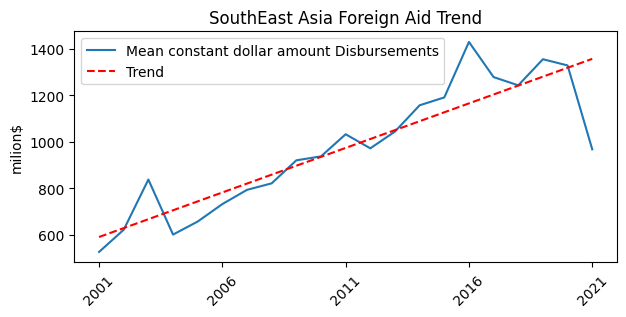

In [121]:
import matplotlib.pylab as pylab
plt.figure(figsize = (7,3))
Xs = [i for i in range(2001, 2022)]


plt.title("SouthEast Asia Foreign Aid Trend")
plt.plot(Xs, ys_sea)
plt.ylabel("milion$")
plt.xticks([i for i in range(2001, 2022,5)], rotation=45)
# plt.plot(Xs, t)
z = np.polyfit(Xs, ys_sea, 1) 
p = np.poly1d(z) 
#     pylab.plot(Xs,ys[num],'o')
pylab.plot(Xs,p(Xs),"r--")
plt.legend(["Mean constant dollar amount Disbursements", "Trend"])
plt.show()

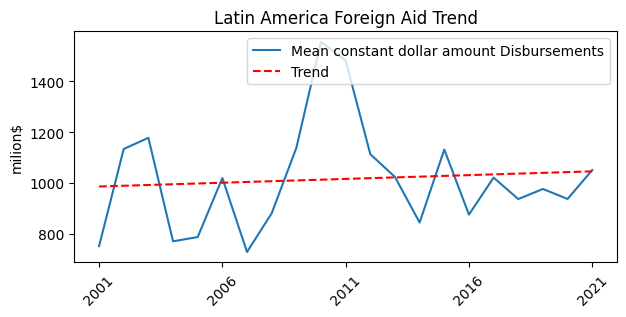

In [122]:
import matplotlib.pylab as pylab
plt.figure(figsize = (7,3))
Xs = [i for i in range(2001, 2022)]


plt.title("Latin America Foreign Aid Trend")
plt.plot(Xs, ys_latin)
plt.ylabel("milion$")
plt.xticks([i for i in range(2001, 2022,5)], rotation=45)
# plt.plot(Xs, t)
z = np.polyfit(Xs, ys_latin, 1) 
p = np.poly1d(z) 
#     pylab.plot(Xs,ys[num],'o')
pylab.plot(Xs,p(Xs),"r--")
plt.legend(["Mean constant dollar amount Disbursements", "Trend"])
plt.show()

In [ ]:
# merge dataframes together

final_anlytcl_df = indicators_transformd_df.merge(aid_transformd_df, how = 'inner', left_on=['year', 'country_name', 'country_code'], right_on = ['fiscal_year_', 'country_name_', 'country_code_']).dropna(axis=0)

In [ ]:
(final_anlytcl_df.isna().sum()/final_anlytcl_df.shape[0]).sort_values(0, ascending= False)

year                                                       0.0
Population ages 30-34, female (% of female population)     0.0
current_dollar_amount_Disbursements                        0.0
constant_dollar_amount_Obligations                         0.0
constant_dollar_amount_Disbursements                       0.0
country_code_                                              0.0
country_name_                                              0.0
fiscal_year_                                               0.0
GDP per capita (current US$)                               0.0
GDP per capita growth (annual %)                           0.0
Sex ratio at birth (male births per female births)         0.0
Secondary education, duration (years)                      0.0
Population, female (% of total population)                 0.0
Population growth (annual %)                               0.0
Population ages 25-29, female (% of female population)     0.0
country_name                                           

<Axes: >

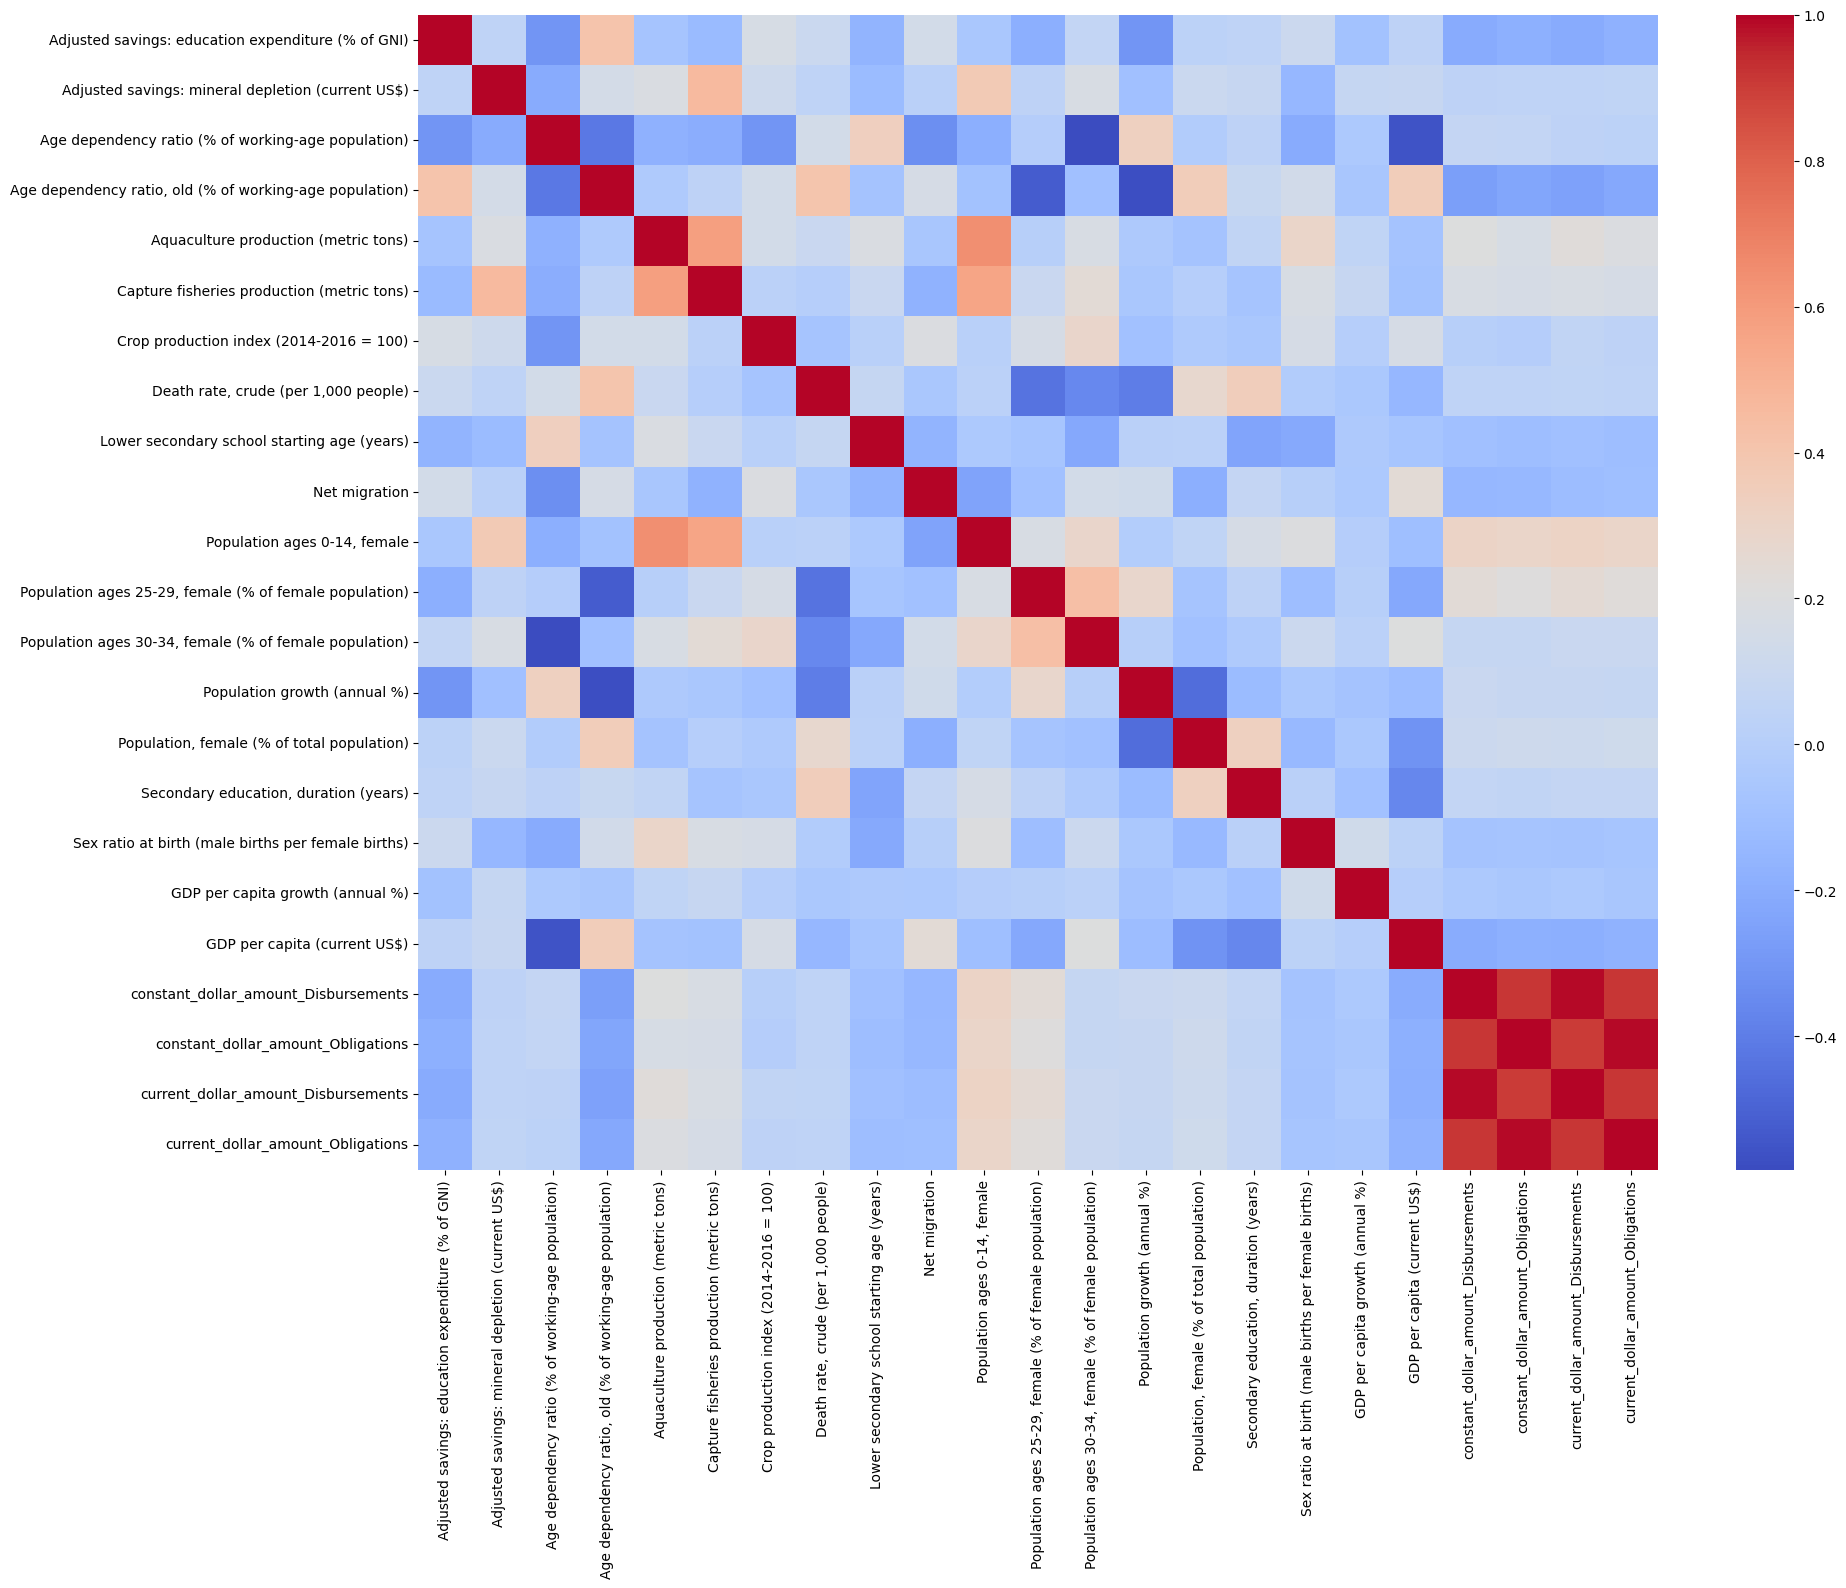

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(final_anlytcl_df.select_dtypes('float64').corr(), cmap='coolwarm')

*   Few features are correlated to US aid amount.




In [ ]:
final_anlytcl_df.dtypes

year                                                        object
country_name                                                object
country_code                                                object
Adjusted savings: education expenditure (% of GNI)         float64
Adjusted savings: mineral depletion (current US$)          float64
Age dependency ratio (% of working-age population)         float64
Age dependency ratio, old (% of working-age population)    float64
Aquaculture production (metric tons)                       float64
Capture fisheries production (metric tons)                 float64
Crop production index (2014-2016 = 100)                    float64
Death rate, crude (per 1,000 people)                       float64
Lower secondary school starting age (years)                float64
Net migration                                              float64
Population ages 0-14, female                               float64
Population ages 25-29, female (% of female population)     flo

# Modeling

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
robust_scaler = RobustScaler()

In [ ]:
%pwd

'/gdrive/.shortcut-targets-by-id/1JOljQjRM1_Z8M4AxVUF-amm8pC8GSc8J/datasets'

In [ ]:
%ls

 45ed633d-f89e-4012-a8d2-c4a0f227034b_Data.csv
'45ed633d-f89e-4012-a8d2-c4a0f227034b_Series - Metadata.csv'
 83a82c17-b06a-41a6-acbd-37ed94cc017c_Data.csv
'83a82c17-b06a-41a6-acbd-37ed94cc017c_Series - Metadata.csv'
 API_DT.ODA.ALLD.CD_DS2_en_csv_v2_5362759.csv
 API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5358428.csv
 API_SI.POV.DDAY_DS2_en_csv_v2_5358982.csv
 API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5358416.csv
 Cambodia-Thailand-Malaysia.csv
'contextualized_topic_model_nc_5_tpm_0.0_tpv_0.8_hs_prodLDA_ac_(100, 100)_do_softplus_lr_0.2_mo_0.002_rp_0.99'/
 country_code_dtls.csv
'CPI2021_GlobalResults&Trends.xlsx'
 CPI2021_RegionalTables.xlsx
 CPI2022_GlobalResultsTrends.xlsx
 latin_america_southeast_asia_usaid_complete.pickle
 Population_Growth_All.csv
 results/
 time_cv_results_actual_pred_dtree_06052023.csv
 time_cv_results_actual_pred_dtree_06062023.csv
 us_foreign_aid_complete.csv
 WorldDevelopmentIndicators.csv
 WorldDevelopmentIndicators_new.csv


In [ ]:
final_anlytcl_df.head(4)

year country_name country_code  \
29  2001    Argentina          ARG   
30  2001      Bolivia          BOL   
31  2001       Brazil          BRA   
32  2001     Cambodia          KHM   

    Adjusted savings: education expenditure (% of GNI)  \
29                                               4.92    
30                                               5.44    
31                                               3.82    
32                                               1.70    

    Adjusted savings: mineral depletion (current US$)  \
29                                       1.750936e+06   
30                                       6.828815e+06   
31                                       1.259382e+09   
32                                       0.000000e+00   

    Age dependency ratio (% of working-age population)  \
29                                          60.685565    
30                                          76.203028    
31                                          53.582669    
32                                          73.400999    

    Age dependency ratio, old (% of working-age population)  \
29                                          15.752251         
30                                           8.966585         
31                                           8.622398         
32                                           5.387602         

    Aquaculture production (metric tons)  \
29                                1340.0   
30                                 320.0   
31                              205568.0   
32                               17500.0   

    Capture fisheries production (metric tons)  \
29                                   931081.00   
30                                     5940.00   
31                                   730378.00   
32                                   427000.01   

    Crop production index (2014-2016 = 100)  \
29                                    63.97   
30                                    57.61   
31                                    57.35   
32                                    36.37   

    Death rate, crude (per 1,000 people)  \
29                                 7.549   
30                                 9.636   
31                                 6.303   
32                                 8.667   

    Lower secondary school starting age (years)  Net migration  \
29                                         12.0       -22787.0   
30                                         12.0       -16536.0   
31                                         11.0         3453.0   
32                                         12.0        -4005.0   

    Population ages 0-14, female  \
29                     5116450.0   
30                     1636393.0   
31                    25653884.0   
32                     2382613.0   

    Population ages 25-29, female (% of female population)  \
29                                           7.525233        
30                                           7.703364        
31                                           8.364954        
32                                           6.799265        

    Population ages 30-34, female (% of female population)  \
29                                           6.519328        
30                                           6.528220        
31                                           7.718659        
32                                           7.544532        

    Population growth (annual %)  Population, female (% of total population)  \
29                      1.099171                                   50.683349   
30                      1.769817                                   49.482317   
31                      1.320695                                   50.489711   
32                      1.793814                                   50.810500   

    Secondary education, duration (years)  \
29                                    6.0   
30                                    6.0   
31                            

In [ ]:
final_anlytcl_df.to_csv('results/analytical_dataset_for_modeling.csv', index=None)

In [ ]:
final_anlytcl_df.columns

Index(['year', 'country_name', 'country_code',
       'Adjusted savings: education expenditure (% of GNI)',
       'Adjusted savings: mineral depletion (current US$)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)',
       'Crop production index (2014-2016 = 100)',
       'Death rate, crude (per 1,000 people)',
       'Lower secondary school starting age (years)', 'Net migration',
       'Population ages 0-14, female',
       'Population ages 25-29, female (% of female population)',
       'Population ages 30-34, female (% of female population)',
       'Population growth (annual %)',
       'Population, female (% of total population)',
       'Secondary education, duration (years)',
       'Sex ratio at birth (male births per female births)',
       'GDP per capita growth (annual %)', 'GDP per capita (current

In [ ]:
final_anlytcl_df.shape

(605, 29)

In [ ]:
# create X and y
X = final_anlytcl_df.select_dtypes('float64').drop('GDP per capita (current US$)', axis=1)
y = final_anlytcl_df['GDP per capita (current US$)']

Text(0.5, 1.0, 'Distribution of Target variable')

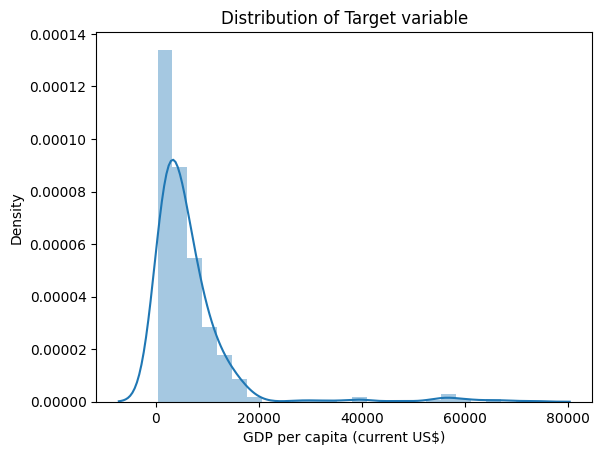

In [ ]:
sns.distplot(y, bins=25)
plt.title("Distribution of Target variable")

In [ ]:
# split data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y_train.shape, y_test.shape

((405,), (200,))

In [ ]:
# scale train n test

X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.fit_transform(X_test)

In [ ]:
# model object

model = sm.OLS(y_train, X_train_scaled)
sk_lin_reg = LinearRegression()

In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

                                      OLS Regression Results                                     
Dep. Variable:     GDP per capita (current US$)   R-squared (uncentered):                   0.637
Model:                                      OLS   Adj. R-squared (uncentered):              0.616
Method:                           Least Squares   F-statistic:                              30.59
Date:                          Thu, 08 Jun 2023   Prob (F-statistic):                    1.25e-70
Time:                                  06:14:40   Log-Likelihood:                         -4157.5
No. Observations:                           405   AIC:                                      8359.
Df Residuals:                               383   BIC:                                      8447.
Df Model:                                    22                                                  
Covariance Type:                      nonrobust                                                  
                 coe

In [ ]:
# fit sklearn model

sk_lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
print(sk_lin_reg.score(X_train_scaled, y_train))

0.7287901810932503


In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, sk_lin_reg.predict(X_test_scaled))))

RMSE:  5484.31831423341


In [ ]:
train_preds = sk_lin_reg.predict(X_train_scaled)
test_preds = sk_lin_reg.predict(X_test_scaled)

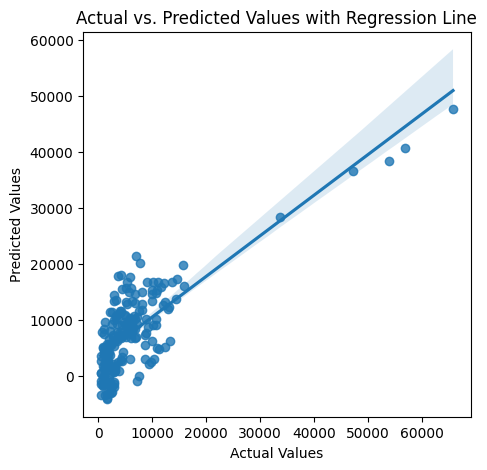

In [ ]:
plt.figure(figsize=(5, 5))
sns.regplot(x=y_test, y=test_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Regression Line')
plt.show()


In [ ]:
print("adj R2 sqaured: ", 1 - (1-r2_score(y_train, train_preds)) * (len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1))

adj R2 sqaured:  0.7131707674389349


## Other models

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
# knn model
knn = KNeighborsRegressor()

In [ ]:
# Define the grid search parameters
param_grid = {'n_neighbors': np.arange(1, 21)}


In [ ]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])}

In [ ]:
# grid search cv
grid_search_cv = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5)

In [ ]:
grid_search_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search_cv.best_params_['n_neighbors'], -grid_search_cv.best_score_


(1, 7243367.348170897)

In [ ]:
# Train a KNN  with best K value
knn_final = KNeighborsRegressor(n_neighbors=18)
knn_final.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=18)

In [ ]:
# Evaluate the performance using cross-validation
cv_scores = cross_val_score(knn_final, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
cv_mse = -cv_scores.mean()

# Print the mean squared error from cross-validation
print("Cross-Validation Mean Squared Error:", cv_mse)


Cross-Validation Mean Squared Error: 41662799.06443799


In [ ]:
knn_preds = knn_final.predict(X_test_scaled)

In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, knn_preds)))

RMSE:  4669.199908956282


### SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm_model = SVR()

In [ ]:
svm_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
svm_preds = svm_model.predict(X_test_scaled)

In [ ]:
print("MSE", mean_squared_error(y_test, svm_preds))

MSE 71645662.45349997


In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, svm_preds)))

RMSE:  8464.376081761726


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_model = DecisionTreeRegressor()

In [ ]:
tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [ ]:
tree_preds = tree_model.predict(X_test_scaled)

In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, tree_preds)))

RMSE:  2918.8430035540896


#### Parameter tuning for small dataset

In [ ]:
# split dataset in train test and val

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
# search param
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create a Decision Tree regressor
param_tree = DecisionTreeRegressor(random_state=42)

In [ ]:
# grid search cv
grid_search = GridSearchCV(param_tree, param_grid, scoring='neg_mean_squared_error', cv=5)

In [ ]:
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.fit_transform(X_test)
X_val_scaled = robust_scaler.fit_transform(X_val)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_tree = grid_search.best_estimator_

In [ ]:
y_val_pred = best_tree.predict(X_val_scaled)

In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(y_val, y_val_pred)))

RMSE:  2681.6221087624576


In [ ]:
final_tree_model = DecisionTreeRegressor(**best_params)

In [ ]:
final_tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(min_samples_leaf=2)

In [ ]:
y_test_pred = final_tree_model.predict(X_test_scaled)

In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE:  2321.068154476304


In [ ]:
X_val.columns

Index(['Adjusted savings: education expenditure (% of GNI)',
       'Adjusted savings: mineral depletion (current US$)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)',
       'Crop production index (2014-2016 = 100)',
       'Death rate, crude (per 1,000 people)',
       'Lower secondary school starting age (years)', 'Net migration',
       'Population ages 0-14, female',
       'Population ages 25-29, female (% of female population)',
       'Population ages 30-34, female (% of female population)',
       'Population growth (annual %)',
       'Population, female (% of total population)',
       'Secondary education, duration (years)',
       'Sex ratio at birth (male births per female births)',
       'GDP per capita growth (annual %)',
       'constant_dollar_amount_Disbursements',
       'constant_dollar_

In [ ]:
from sklearn.tree import plot_tree

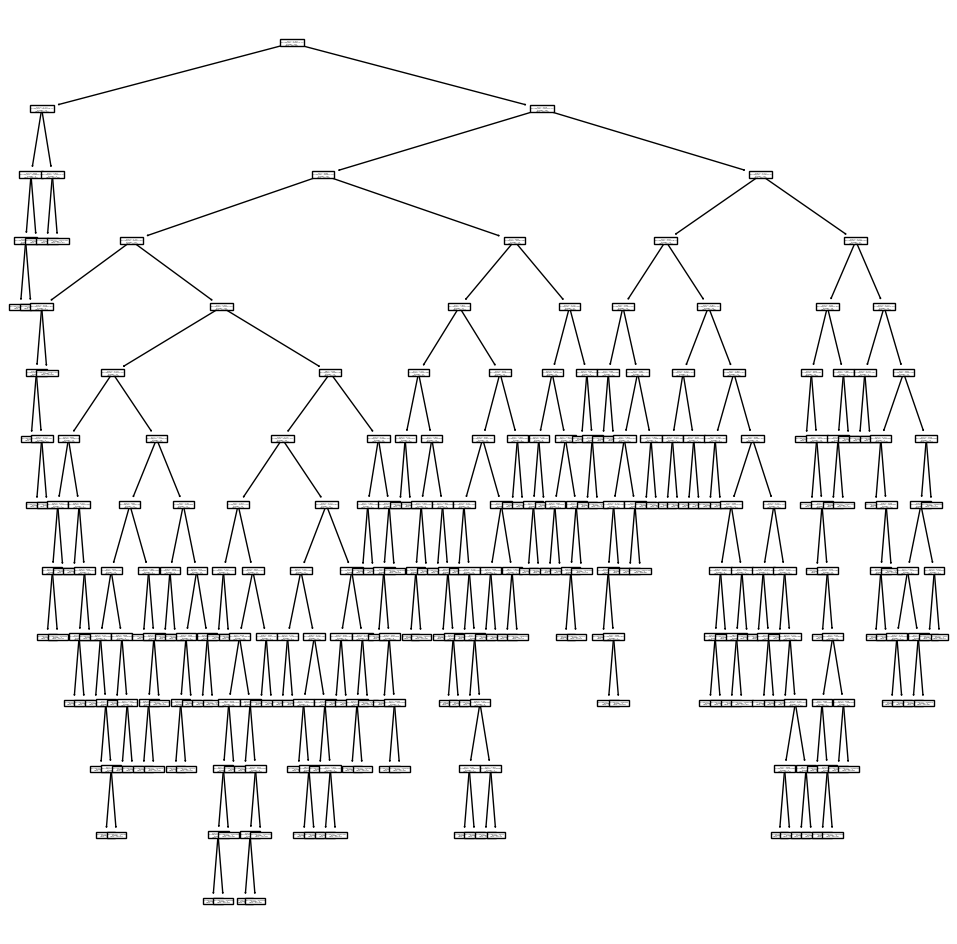

In [ ]:
plt.figure(figsize=(12,12)) 
plot_tree(final_tree_model)
plt.show()

# Time Based CV for result reporting

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
final_anlytcl_df.head(2)

year country_name country_code  \
29  2001    Argentina          ARG   
30  2001      Bolivia          BOL   

    Adjusted savings: education expenditure (% of GNI)  \
29                                               4.92    
30                                               5.44    

    Adjusted savings: mineral depletion (current US$)  \
29                                        1750935.579   
30                                        6828815.402   

    Age dependency ratio (% of working-age population)  \
29                                          60.685565    
30                                          76.203028    

    Age dependency ratio, old (% of working-age population)  \
29                                          15.752251         
30                                           8.966585         

    Aquaculture production (metric tons)  \
29                                1340.0   
30                                 320.0   

    Capture fisheries production (metric tons)  \
29                                    931081.0   
30                                      5940.0   

    Crop production index (2014-2016 = 100)  \
29                                    63.97   
30                                    57.61   

    Death rate, crude (per 1,000 people)  \
29                                 7.549   
30                                 9.636   

    Lower secondary school starting age (years)  Net migration  \
29                                         12.0       -22787.0   
30                                         12.0       -16536.0   

    Population ages 0-14, female  \
29                     5116450.0   
30                     1636393.0   

    Population ages 25-29, female (% of female population)  \
29                                           7.525233        
30                                           7.703364        

    Population ages 30-34, female (% of female population)  \
29                                           6.519328        
30                                           6.528220        

    Population growth (annual %)  Population, female (% of total population)  \
29                      1.099171                                   50.683349   
30                      1.769817                                   49.482317   

    Secondary education, duration (years)  \
29                                    6.0   
30                                    6.0   

    Sex ratio at birth (male births per female births)  \
29                                              1.054    
30                                              1.041    

    GDP per capita growth (annual %)  GDP per capita (current US$)  \
29                         -5.453797                   7168.975872   
30                         -0.099987                    930.878080   

   fiscal_year_ country_name_ country_code_  \
29         2001     Argentina           ARG   
30         2001       Bolivia           BOL   

    constant_dollar_amount_Disbursements  constant_dollar_amount_Obligations  \
29                             5973059.0                           5975908.0   
30                           230389238.0                         288766410.0   

    current_dollar_amount_Disbursements  current_dollar_amount_Obligations  
29                            4188748.0                          4190746.0  
30                          161565887.0                        202504261.0

In [ ]:
# define time based cv

tscv = TimeSeriesSplit(n_splits=2, test_size=3)

In [ ]:
grouped_df = final_anlytcl_df.groupby("country_name")

In [ ]:
grouped_df.groups.keys()

dict_keys(['Argentina', 'Bolivia', 'Brazil', 'Cambodia', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Indonesia', 'Malaysia', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Singapore', 'Suriname', 'Thailand', 'Timor-Leste', 'Uruguay', 'Vietnam'])

In [ ]:
X_val.columns

Index(['Adjusted savings: education expenditure (% of GNI)',
       'Adjusted savings: mineral depletion (current US$)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)',
       'Crop production index (2014-2016 = 100)',
       'Death rate, crude (per 1,000 people)',
       'Lower secondary school starting age (years)', 'Net migration',
       'Population ages 0-14, female',
       'Population ages 25-29, female (% of female population)',
       'Population ages 30-34, female (% of female population)',
       'Population growth (annual %)',
       'Population, female (% of total population)',
       'Secondary education, duration (years)',
       'Sex ratio at birth (male births per female births)',
       'GDP per capita growth (annual %)',
       'constant_dollar_amount_Disbursements',
       'constant_dollar_

In [ ]:
# define feature names

FEAT_LIST = ['Adjusted savings: education expenditure (% of GNI)',
       'Adjusted savings: mineral depletion (current US$)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)',
       'Crop production index (2014-2016 = 100)',
       'Death rate, crude (per 1,000 people)',
       'Lower secondary school starting age (years)', 'Net migration',
       'Population ages 0-14, female',
       'Population ages 25-29, female (% of female population)',
       'Population ages 30-34, female (% of female population)',
       'Population growth (annual %)',
       'Population, female (% of total population)',
       'Secondary education, duration (years)',
       'Sex ratio at birth (male births per female births)',
       'GDP per capita growth (annual %)',
       'constant_dollar_amount_Disbursements',
       'constant_dollar_amount_Obligations',
       'current_dollar_amount_Disbursements',
       'current_dollar_amount_Obligations']

OUTCOME = ['GDP per capita (current US$)']

In [ ]:
results_df_list = []

for group in grouped_df.groups.keys():
  grp_df = grouped_df.get_group(group)
  grp_df.index = grp_df.year
  for i, (train_index, test_index) in enumerate(tscv.split(grp_df)):
    print(group)

    # split into train test
    train_ = grp_df.iloc[train_index]
    test_ = grp_df.iloc[test_index]

    # print train, test index
    print("Train years: ", train_.index.min(), "---", train_.index.max(), '\t', f'Size: {train_.shape}')
    print("Test years: ",  test_.index.min(), "---", test_.index.max(), '\t', f'Size: {test_.shape}')

    # tree_ = DecisionTreeRegressor(**best_params)
    X_train, y_train = train_[FEAT_LIST], train_[OUTCOME].values
    X_test, y_test = test_[FEAT_LIST], test_[OUTCOME].values

    scaled_train = robust_scaler.fit_transform(X_train)
    scaled_test = robust_scaler.fit_transform(X_test)

    # predict using model object
    # tree_.fit(scaled_train, y_train)
    train_preds, test_preds = final_tree_model.predict(scaled_train), final_tree_model.predict(scaled_test)
    
    # print error rates
    print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, train_preds)))
    print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, test_preds)))
    print("\n")

    # results in df
    X_train['country_name'], X_test['country_name'] = group, group
    X_train['split_name'], X_test['split_name'] = 'train', 'test' 
    X_train['actual'], X_test['actual'] = y_train, y_test
    X_train['predicted'], X_test['predicted'] = train_preds, test_preds

    results_df_list.append([X_train, X_test])

Argentina
Train years:  2001 --- 2015 	 Size: (15, 29)
Test years:  2016 --- 2018 	 Size: (3, 29)
Train RMSE:  4735.518388276946
Test RMSE:  10588.037239596697


Argentina
Train years:  2001 --- 2018 	 Size: (18, 29)
Test years:  2019 --- 2021 	 Size: (3, 29)
Train RMSE:  4309.065434856368
Test RMSE:  6971.037398232536


Bolivia
Train years:  2001 --- 2015 	 Size: (15, 29)
Test years:  2016 --- 2018 	 Size: (3, 29)
Train RMSE:  2629.6134552352382
Test RMSE:  3406.4814692003383


Bolivia
Train years:  2001 --- 2018 	 Size: (18, 29)
Test years:  2019 --- 2021 	 Size: (3, 29)
Train RMSE:  3594.838782039615
Test RMSE:  1290.558503857294


Brazil
Train years:  2001 --- 2015 	 Size: (15, 29)
Test years:  2016 --- 2018 	 Size: (3, 29)
Train RMSE:  5413.269973263395
Test RMSE:  5500.486897386169


Brazil
Train years:  2001 --- 2018 	 Size: (18, 29)
Test years:  2019 --- 2021 	 Size: (3, 29)
Train RMSE:  4679.264588205494
Test RMSE:  4739.5490624135555


Cambodia
Train years:  2001 --- 2015 	 S

In [ ]:
dfs_within_sublists = [pd.concat(sublist) for sublist in results_df_list]


In [ ]:
results_final_df = pd.concat(dfs_within_sublists)

In [ ]:
results_final_df.shape

(1123, 26)

In [ ]:
%pwd

'/gdrive/.shortcut-targets-by-id/1JOljQjRM1_Z8M4AxVUF-amm8pC8GSc8J/datasets'

In [ ]:
results_final_df.reset_index(inplace=True)

In [ ]:
results_final_df.to_csv('time_cv_results_actual_pred_dtree_06062023.csv', index=False)

In [ ]:
results_final_df.head()

year  Adjusted savings: education expenditure (% of GNI)  \
0  2001                                               4.92    
1  2002                                               4.30    
2  2003                                               3.74    
3  2004                                               3.30    
4  2005                                               3.49    

   Adjusted savings: mineral depletion (current US$)  \
0                                       1.750936e+06   
1                                       1.140469e+08   
2                                       1.405692e+08   
3                                       2.196619e+08   
4                                       2.452446e+08   

   Age dependency ratio (% of working-age population)  \
0                                          60.685565    
1                                          60.254560    
2                                          59.782935    
3                                          59.301799    
4                                          58.838458    

   Age dependency ratio, old (% of working-age population)  \
0                                          15.752251         
1                                          15.811409         
2                                          15.851879         
3                                          15.895177         
4                                          15.967618         

   Aquaculture production (metric tons)  \
0                                1340.0   
1                                1457.0   
2                                1647.0   
3                                1848.0   
4                                2057.0   

   Capture fisheries production (metric tons)  \
0                                    931081.0   
1                                    946185.0   
2                                    910200.0   
3                                    944846.0   
4                                    929937.0   

   Crop production index (2014-2016 = 100)  \
0                                    63.97   
1                                    65.16   
2                                    67.65   
3                                    66.51   
4                                    77.51   

   Death rate, crude (per 1,000 people)  \
0                                 7.549   
1                                 7.518   
2                                 7.864   
3                                 7.480   
4                                 7.423   

   Lower secondary school starting age (years)  Net migration  \
0                                         12.0       -22787.0   
1                                         12.0       -22668.0   
2                                         12.0       -22353.0   
3                                         12.0       -22336.0   
4                                         12.0       -21961.0   

   Population ages 0-14, female  \
0                     5116450.0   
1                     5128289.0   
2                     5136127.0   
3                     5141261.0   
4                     5144413.0   

   Population ages 25-29, female (% of female population)  \
0                                           7.525233        
1                                           7.639597        
2                                           7.736716        
3                                           7.804951        
4                                           7.842341        

   Population ages 30-34, female (% of female population)  \
0                                           6.519328        
1                                           6.596795        
2                                           6.701253        
3                                           6.829338        
4                                           6.958498        

   Population growth (annual %)  Population, female (% of total population)  \
0                      1.099171                                   

# Model Analysis

In [ ]:
analysis_df = results_final_df.copy()

In [ ]:
# region mapping
southeast_asia = [
    'BRN',
    'IDN',
    'KHM',
    'LAO',
    'MMR',
    'MYS',
    'PHL',
    'SGP',
    'THA',
    'TLS',
    'VNM'
]

country_mapping = {
    'Brunei': 'BRN',
    'Indonesia': 'IDN',
    'Cambodia': 'KHM',
    'Laos': 'LAO',
    'Myanmar': 'MMR',
    'Malaysia': 'MYS',
    'Philippines': 'PHL',
    'Singapore': 'SGP',
    'Thailand': 'THA',
    'Timor-Leste': 'TLS',
    'Vietnam': 'VNM',
    'Argentina': 'ARG',
    'Bolivia': 'BOL',
    'Brazil': 'BRA',
    'Chile': 'CHL',
    'Colombia': 'COL',
    'Costa Rica': 'CRI',
    'Cuba': 'CUB',
    'Dominican Republic': 'DOM',
    'Ecuador': 'ECU',
    'Guatemala': 'GTM',
    'Guyana': 'GUY',
    'Honduras': 'HND',
    'Haiti': 'HTI',
    'Mexico': 'MEX',
    'Nicaragua': 'NIC',
    'Panama': 'PAN',
    'Peru': 'PER',
    'Puerto Rico': 'PRI',
    'Paraguay': 'PRY',
    'El Salvador': 'SLV',
    'Suriname': 'SUR',
    'Uruguay': 'URY',
    'Venezuela': 'VEN'
}

analysis_df['country_code'] = analysis_df.country_name.map(country_mapping)

analysis_df['region'] = np.where(analysis_df.country_code.isin(southeast_asia), 'South-East Asia', 'Latin America')

In [ ]:
analysis_df.drop_duplicates(['country_code', 'year'], keep='last', inplace=True)

In [ ]:
# analysis_df.reset_index(inplace=True)

In [ ]:
analysis_df.head()

year  Adjusted savings: education expenditure (% of GNI)  \
18  2001                                               4.92    
19  2002                                               4.30    
20  2003                                               3.74    
21  2004                                               3.30    
22  2005                                               3.49    

    Adjusted savings: mineral depletion (current US$)  \
18                                       1.750936e+06   
19                                       1.140469e+08   
20                                       1.405692e+08   
21                                       2.196619e+08   
22                                       2.452446e+08   

    Age dependency ratio (% of working-age population)  \
18                                          60.685565    
19                                          60.254560    
20                                          59.782935    
21                                          59.301799    
22                                          58.838458    

    Age dependency ratio, old (% of working-age population)  \
18                                          15.752251         
19                                          15.811409         
20                                          15.851879         
21                                          15.895177         
22                                          15.967618         

    Aquaculture production (metric tons)  \
18                                1340.0   
19                                1457.0   
20                                1647.0   
21                                1848.0   
22                                2057.0   

    Capture fisheries production (metric tons)  \
18                                    931081.0   
19                                    946185.0   
20                                    910200.0   
21                                    944846.0   
22                                    929937.0   

    Crop production index (2014-2016 = 100)  \
18                                    63.97   
19                                    65.16   
20                                    67.65   
21                                    66.51   
22                                    77.51   

    Death rate, crude (per 1,000 people)  \
18                                 7.549   
19                                 7.518   
20                                 7.864   
21                                 7.480   
22                                 7.423   

    Lower secondary school starting age (years)  Net migration  \
18                                         12.0       -22787.0   
19                                         12.0       -22668.0   
20                                         12.0       -22353.0   
21                                         12.0       -22336.0   
22                                         12.0       -21961.0   

    Population ages 0-14, female  \
18                     5116450.0   
19                     5128289.0   
20                     5136127.0   
21                     5141261.0   
22                     5144413.0   

    Population ages 25-29, female (% of female population)  \
18                                           7.525233        
19                                           7.639597        
20                                           7.736716        
21                                           7.804951        
22                                           7.842341        

    Population ages 30-34, female (% of female population)  \
18                                           6.519328        
19                                           6.596795        
20                                           6.701253        
21                                           6.829338        
22                                           6.958498        

    Population growth (annual %)  Population, female (% of total populatio

In [ ]:
analysis_df.shape

(605, 29)

In [ ]:
analysis_df[analysis_df.duplicated(['year', 'country_name'])]

Empty DataFrame
Columns: [year, Adjusted savings: education expenditure (% of GNI), Adjusted savings: mineral depletion (current US$), Age dependency ratio (% of working-age population), Age dependency ratio, old (% of working-age population), Aquaculture production (metric tons), Capture fisheries production (metric tons), Crop production index (2014-2016 = 100), Death rate, crude (per 1,000 people), Lower secondary school starting age (years), Net migration, Population ages 0-14, female, Population ages 25-29, female (% of female population), Population ages 30-34, female (% of female population), Population growth (annual %), Population, female (% of total population), Secondary education, duration (years), Sex ratio at birth (male births per female births), GDP per capita growth (annual %), constant_dollar_amount_Disbursements, constant_dollar_amount_Obligations, current_dollar_amount_Disbursements, current_dollar_amount_Obligations, country_name, split_name, actual, predicted, country_code, region]
Index: []

In [ ]:
analysis_df['error'] = analysis_df['predicted'] - analysis_df['actual']

In [ ]:
plot_df = analysis_df.groupby(["country_name", 'year', "split_name"]).agg({'error':'mean'}).reset_index()

In [ ]:
plot_df.head()

country_name  year split_name        error
0    Argentina  2001      train -4065.183749
1    Argentina  2002      train   552.595050
2    Argentina  2003      train -1626.788065
3    Argentina  2004      train -1126.076442
4    Argentina  2005      train -1954.543942

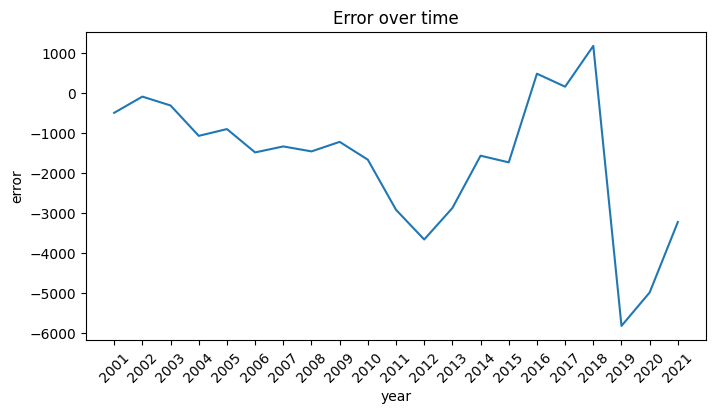

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='year', y='error', data = plot_df, ci=None)
plt.xticks(rotation=45)
plt.title("Error over time")
plt.show()

In [ ]:
feat_importances = pd.DataFrame(final_tree_model.feature_importances_, index=X_val.columns, columns = ['features_importance']).reset_index()
feat_importances.sort_values('features_importance', ascending=False, inplace=True)

In [ ]:
feat_importances.head()

index  features_importance
2   Age dependency ratio (% of working-age populat...             0.780138
14         Population, female (% of total population)             0.068971
3   Age dependency ratio, old (% of working-age po...             0.064683
18               constant_dollar_amount_Disbursements             0.021809
9                                       Net migration             0.017613

Text(0, 0.5, 'feature name')

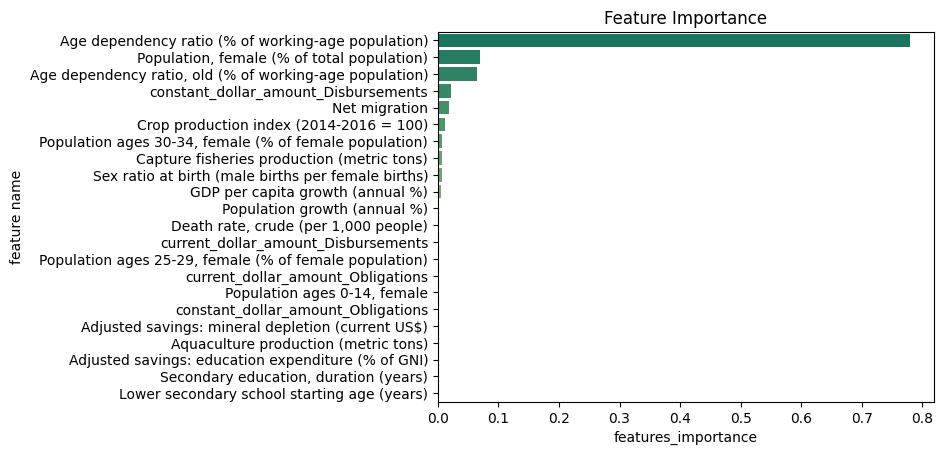

In [ ]:
# plt.figure(figsize=(10, 8))
sns.barplot(x = 'features_importance', y = 'index', data = feat_importances, palette="summer")
plt.title("Feature Importance")
plt.ylabel("feature name")

## SHAP analysis

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 23.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(final_tree_model)

In [ ]:
shap_values = explainer.shap_values(X_test_scaled)

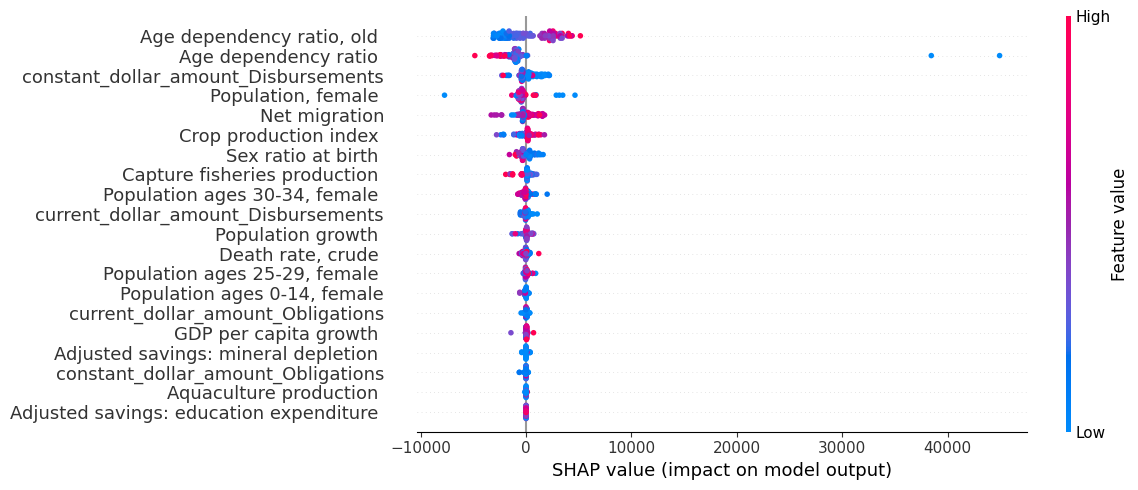

In [ ]:
# plt.figure(figsize=(10, 15))
shap.summary_plot(shap_values, X_test_scaled, feature_names=[x.split("(")[0] for x in FEAT_LIST], plot_size=[12, 5])

## Region analysis

In [ ]:
plot_df = analysis_df.groupby(["region", 'year', "split_name"]).agg({'error':'mean'}).reset_index()

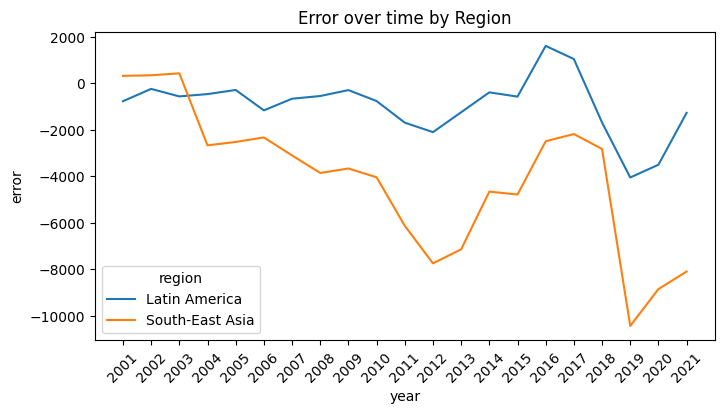

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='year', y='error', data = plot_df, ci=None, hue = "region")
plt.xticks(rotation=45)
plt.title("Error over time by Region")
plt.show()

In [ ]:
analysis_df.head(2)

year  Adjusted savings: education expenditure (% of GNI)  \
18  2001                                               4.92    
19  2002                                               4.30    

    Adjusted savings: mineral depletion (current US$)  \
18                                       1.750936e+06   
19                                       1.140469e+08   

    Age dependency ratio (% of working-age population)  \
18                                          60.685565    
19                                          60.254560    

    Age dependency ratio, old (% of working-age population)  \
18                                          15.752251         
19                                          15.811409         

    Aquaculture production (metric tons)  \
18                                1340.0   
19                                1457.0   

    Capture fisheries production (metric tons)  \
18                                    931081.0   
19                                    946185.0   

    Crop production index (2014-2016 = 100)  \
18                                    63.97   
19                                    65.16   

    Death rate, crude (per 1,000 people)  \
18                                 7.549   
19                                 7.518   

    Lower secondary school starting age (years)  Net migration  \
18                                         12.0       -22787.0   
19                                         12.0       -22668.0   

    Population ages 0-14, female  \
18                     5116450.0   
19                     5128289.0   

    Population ages 25-29, female (% of female population)  \
18                                           7.525233        
19                                           7.639597        

    Population ages 30-34, female (% of female population)  \
18                                           6.519328        
19                                           6.596795        

    Population growth (annual %)  Population, female (% of total population)  \
18                      1.099171                                   50.683349   
19                      1.073538                                   50.683207   

    Secondary education, duration (years)  \
18                                    6.0   
19                                    6.0   

    Sex ratio at birth (male births per female births)  \
18                                              1.054    
19                                              1.054    

    GDP per capita growth (annual %)  constant_dollar_amount_Disbursements  \
18                         -5.453797                             5973059.0   
19                        -11.845950                             4412433.0   

    constant_dollar_amount_Obligations  current_dollar_amount_Disbursements  \
18                           5975908.0                            4188748.0   
19                           4411026.0                            3143932.0   

    current_dollar_amount_Obligations country_name split_name       actual  \
18                          4190746.0    Argentina      train  7168.975872   
19                          3142930.0    Argentina      train  2579.488769   

      predicted country_code         region        error  
18  3103.792123          ARG  Latin America -4065.183749  
19  3132.083819          ARG  Latin America   552.595050

In [ ]:
def r2_rmse(g):
    r2 = r2_score(g['actual'], g['predicted'])
    rmse = np.sqrt(mean_squared_error(g['actual'], g['predicted']))
    return pd.Series(dict(r2 = r2, rmse = rmse))

In [ ]:
plot_df = analysis_df.groupby(['year', 'region']).apply(r2_rmse).reset_index()

In [ ]:
plot_df.head()

year           region        r2         rmse
0  2001    Latin America -0.695010  2610.578510
1  2001  South-East Asia -0.559248  1496.700582
2  2002    Latin America -2.935353  3169.640817
3  2002  South-East Asia -0.419766  1520.791501
4  2003    Latin America -2.617542  2930.696295

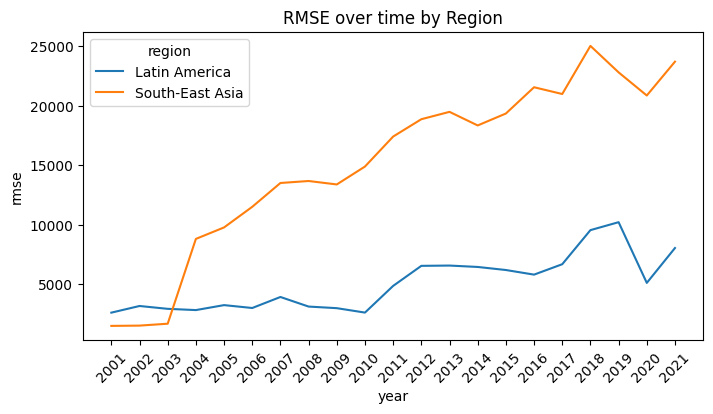

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='year', y='rmse', data = plot_df, ci=None, hue = "region")
plt.xticks(rotation=45)
plt.title("RMSE over time by Region")
plt.show()

# Ensemble models

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor 

In [ ]:
# 
final_anlytcl_df = indicators_transformd_df.merge(aid_transformd_df, how = 'inner', left_on=['year', 'country_name', 'country_code'], 
                                                  right_on = ['fiscal_year_', 'country_name_', 'country_code_'])\
                                      .dropna(axis=0)

In [ ]:
X = final_anlytcl_df.select_dtypes("float64").drop('GDP per capita (current US$)', axis=1)
y = final_anlytcl_df['GDP per capita (current US$)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

In [ ]:
hist_gbm_model = HistGradientBoostingRegressor(random_state=42)

In [ ]:
hist_gbm_model.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=42)

In [ ]:
preds = hist_gbm_model.predict(X_test)

In [ ]:
print("R2 score: ", r2_score(y_test, preds))

R2 score:  0.9450330459142946


In [ ]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, preds)))

RMSE :  2015.5327626138524


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = final_anlytcl_df.select_dtypes("float64").drop('GDP per capita (current US$)', axis=1).dropna(axis=0)
y = final_anlytcl_df.dropna(axis=0)['GDP per capita (current US$)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
preds = rf_model.predict(X_test)

In [ ]:
print("R2 score: ", r2_score(y_test, preds))

R2 score:  0.9830006891649438


In [ ]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, preds)))

RMSE :  1120.8685500715123


In [ ]:
feat_df = pd.DataFrame(rf_model.feature_importances_, index = [x.split("(")[0] for x in X.columns]).sort_values(0, ascending=False).reset_index()

Text(0.5, 0, 'Feature Importance')

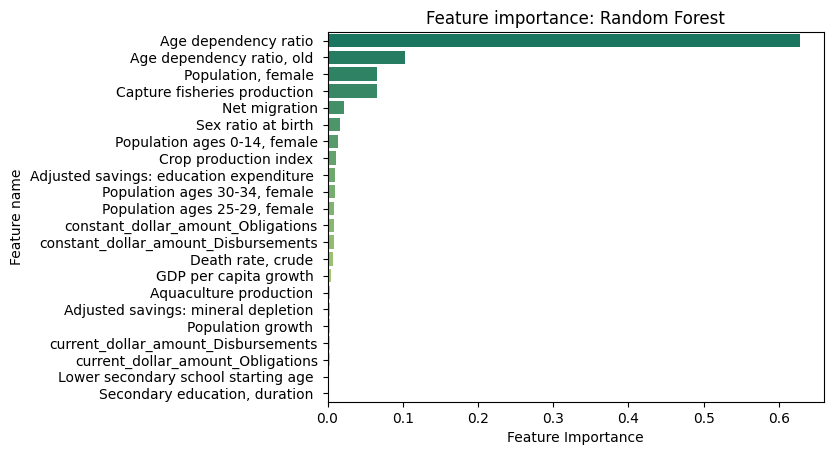

In [ ]:
sns.barplot(data = feat_df, x = 0, y = 'index', palette="summer")
plt.title("Feature importance: Random Forest")
plt.ylabel("Feature name")
plt.xlabel("Feature Importance")

In [ ]:
explainer = shap.TreeExplainer(rf_model)

In [ ]:
shap_values = explainer.shap_values(X_test)

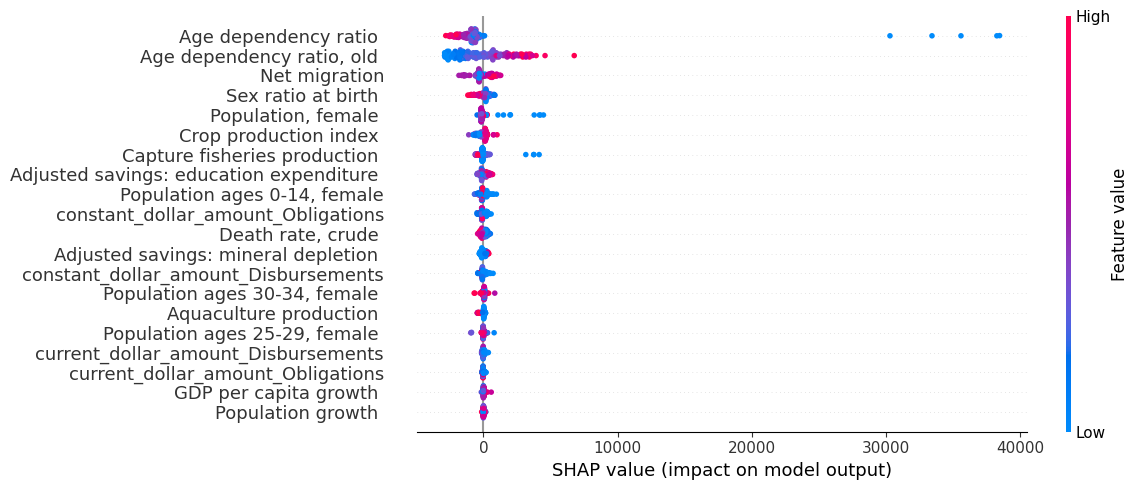

In [ ]:
# plt.figure(figsize=(10, 15))
shap.summary_plot(shap_values, X_test, feature_names=[x.split("(")[0] for x in X.columns], plot_size=[12, 5])

In [ ]:
explainer.expected_value

array([6692.27438928])

In [ ]:
X_test.columns

Index(['Adjusted savings: education expenditure (% of GNI)',
       'Adjusted savings: mineral depletion (current US$)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)',
       'Crop production index (2014-2016 = 100)',
       'Death rate, crude (per 1,000 people)',
       'Lower secondary school starting age (years)', 'Net migration',
       'Population ages 0-14, female',
       'Population ages 25-29, female (% of female population)',
       'Population ages 30-34, female (% of female population)',
       'Population growth (annual %)',
       'Population, female (% of total population)',
       'Secondary education, duration (years)',
       'Sex ratio at birth (male births per female births)',
       'GDP per capita growth (annual %)',
       'constant_dollar_amount_Disbursements',
       'constant_dollar_

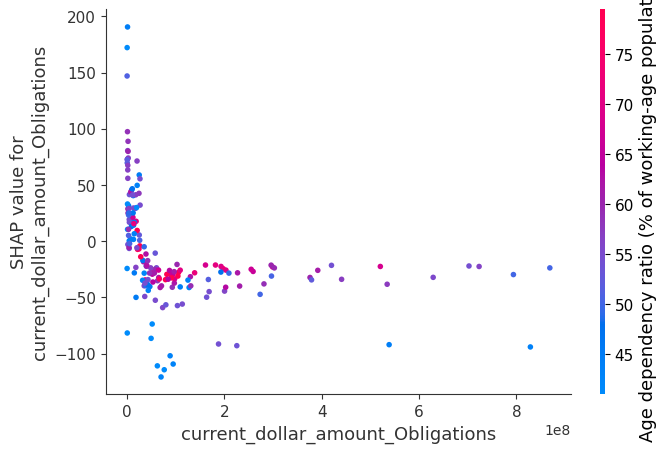

In [ ]:
shap.dependence_plot("current_dollar_amount_Obligations", shap_values, X_test)

### Time based CV - RF Model

In [ ]:
grouped_df = final_anlytcl_df.groupby("country_name")

In [ ]:
results_df_list = []

for group in grouped_df.groups.keys():
  grp_df = grouped_df.get_group(group)
  grp_df.index = grp_df.year
  for i, (train_index, test_index) in enumerate(tscv.split(grp_df)):
    print(group)

    # split into train test
    train_ = grp_df.iloc[train_index]
    test_ = grp_df.iloc[test_index]

    # print train, test index
    print("Train years: ", train_.index.min(), "---", train_.index.max(), '\t', f'Size: {train_.shape}')
    print("Test years: ",  test_.index.min(), "---", test_.index.max(), '\t', f'Size: {test_.shape}')

    # tree_ = DecisionTreeRegressor(**best_params)
    X_train, y_train = train_[FEAT_LIST], train_[OUTCOME].values
    X_test, y_test = test_[FEAT_LIST], test_[OUTCOME].values

    # scaled_train = robust_scaler.fit_transform(X_train)
    # scaled_test = robust_scaler.fit_transform(X_test)

    # predict using model object
    # tree_.fit(scaled_train, y_train)
    train_preds, test_preds = rf_model.predict(X_train), rf_model.predict(X_test)
    
    # print error rates
    print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, train_preds)))
    print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, test_preds)))
    print("\n")

    # results in df
    X_train['country_name'], X_test['country_name'] = group, group
    X_train['split_name'], X_test['split_name'] = 'train', 'test' 
    X_train['actual'], X_test['actual'] = y_train, y_test
    X_train['predicted'], X_test['predicted'] = train_preds, test_preds

    results_df_list.append([X_train, X_test])

Argentina
Train years:  2001 --- 2015 	 Size: (15, 29)
Test years:  2016 --- 2018 	 Size: (3, 29)
Train RMSE:  1185.8773397803602
Test RMSE:  906.4794273873516


Argentina
Train years:  2001 --- 2018 	 Size: (18, 29)
Test years:  2019 --- 2021 	 Size: (3, 29)
Train RMSE:  1144.0593135337012
Test RMSE:  634.3384923582945


Bolivia
Train years:  2001 --- 2015 	 Size: (15, 29)
Test years:  2016 --- 2018 	 Size: (3, 29)
Train RMSE:  203.0589805222598
Test RMSE:  421.990235580931


Bolivia
Train years:  2001 --- 2018 	 Size: (18, 29)
Test years:  2019 --- 2021 	 Size: (3, 29)
Train RMSE:  253.0614242890933
Test RMSE:  226.681672885721


Brazil
Train years:  2001 --- 2015 	 Size: (15, 29)
Test years:  2016 --- 2018 	 Size: (3, 29)
Train RMSE:  1586.256460037042
Test RMSE:  823.7283981047901


Brazil
Train years:  2001 --- 2018 	 Size: (18, 29)
Test years:  2019 --- 2021 	 Size: (3, 29)
Train RMSE:  1486.5831212824103
Test RMSE:  844.4433339807964


Cambodia
Train years:  2001 --- 2015 	 Size

In [ ]:
dfs_within_sublists = [pd.concat(sublist) for sublist in results_df_list]

In [ ]:
results_final_df = pd.concat(dfs_within_sublists)

In [ ]:
results_final_df.reset_index(inplace=True)

In [ ]:
analysis_df = results_final_df.copy()

In [ ]:
analysis_df['country_code'] = analysis_df.country_name.map(country_mapping)

analysis_df['region'] = np.where(analysis_df.country_code.isin(southeast_asia), 'South-East Asia', 'Latin America')

In [ ]:
analysis_df.drop_duplicates(['country_code', 'year'], keep='last', inplace=True)

In [ ]:
plot_df = analysis_df.groupby(['year', 'region']).apply(r2_rmse).reset_index()

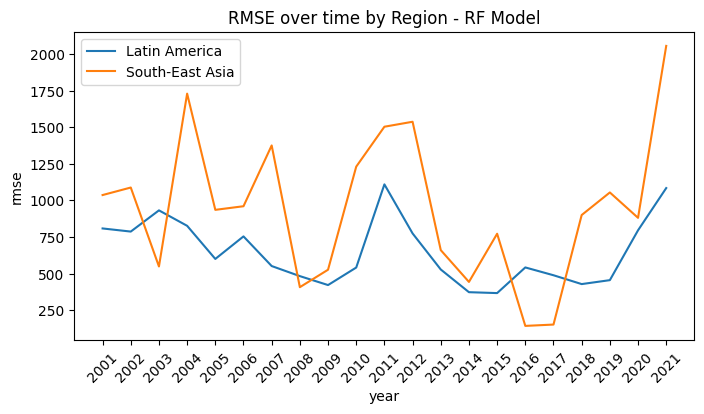

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='year', y='rmse', data = plot_df, ci=None, hue = "region")
plt.legend(loc = "upper left")
plt.xticks(rotation=45)
plt.title("RMSE over time by Region - RF Model")
plt.show()

## Model analysis by Clusters

In [ ]:
# read clustering file
cpi_gdp_clus_df = pd.read_csv('results/kmeans_gdp_cpi_clustering_jimin.csv')

In [ ]:
cpi_gdp_clus_df.head()

country_name country_code                       series_name  \
0     Thailand          THA  GDP per capita growth (annual %)   
1    Singapore          SGP  GDP per capita growth (annual %)   
2  Philippines          PHL  GDP per capita growth (annual %)   
3    Nicaragua          NIC  GDP per capita growth (annual %)   
4       Mexico          MEX  GDP per capita growth (annual %)   

         series_code           year  metric_value  kmeans_label  CPI  
0  NY.GDP.PCAP.KD.ZG  2021_[yr2021]      1.355957             2   35  
1  NY.GDP.PCAP.KD.ZG  2021_[yr2021]     12.196721             3   85  
2  NY.GDP.PCAP.KD.ZG  2021_[yr2021]      4.135109             2   33  
3  NY.GDP.PCAP.KD.ZG  2021_[yr2021]      8.819856             0   20  
4  NY.GDP.PCAP.KD.ZG  2021_[yr2021]      4.136372             2   31

In [ ]:
analysis_df.head()

year  Adjusted savings: education expenditure (% of GNI)  \
18  2001                                               4.92    
19  2002                                               4.30    
20  2003                                               3.74    
21  2004                                               3.30    
22  2005                                               3.49    

    Adjusted savings: mineral depletion (current US$)  \
18                                       1.750936e+06   
19                                       1.140469e+08   
20                                       1.405692e+08   
21                                       2.196619e+08   
22                                       2.452446e+08   

    Age dependency ratio (% of working-age population)  \
18                                          60.685565    
19                                          60.254560    
20                                          59.782935    
21                                          59.301799    
22                                          58.838458    

    Age dependency ratio, old (% of working-age population)  \
18                                          15.752251         
19                                          15.811409         
20                                          15.851879         
21                                          15.895177         
22                                          15.967618         

    Aquaculture production (metric tons)  \
18                                1340.0   
19                                1457.0   
20                                1647.0   
21                                1848.0   
22                                2057.0   

    Capture fisheries production (metric tons)  \
18                                    931081.0   
19                                    946185.0   
20                                    910200.0   
21                                    944846.0   
22                                    929937.0   

    Crop production index (2014-2016 = 100)  \
18                                    63.97   
19                                    65.16   
20                                    67.65   
21                                    66.51   
22                                    77.51   

    Death rate, crude (per 1,000 people)  \
18                                 7.549   
19                                 7.518   
20                                 7.864   
21                                 7.480   
22                                 7.423   

    Lower secondary school starting age (years)  Net migration  \
18                                         12.0       -22787.0   
19                                         12.0       -22668.0   
20                                         12.0       -22353.0   
21                                         12.0       -22336.0   
22                                         12.0       -21961.0   

    Population ages 0-14, female  \
18                     5116450.0   
19                     5128289.0   
20                     5136127.0   
21                     5141261.0   
22                     5144413.0   

    Population ages 25-29, female (% of female population)  \
18                                           7.525233        
19                                           7.639597        
20                                           7.736716        
21                                           7.804951        
22                                           7.842341        

    Population ages 30-34, female (% of female population)  \
18                                           6.519328        
19                                           6.596795        
20                                           6.701253        
21                                           6.829338        
22                                           6.958498        

    Population growth (annual %)  Population, female (% of total populatio

In [ ]:
clus_anlys_df = analysis_df.merge(cpi_gdp_clus_df[['country_name', 'metric_value', 'kmeans_label', 'CPI']],
                                  how = 'left', on = ['country_name'])

In [ ]:
clus_anlys_df.head()

year  Adjusted savings: education expenditure (% of GNI)  \
0  2001                                               4.92    
1  2002                                               4.30    
2  2003                                               3.74    
3  2004                                               3.30    
4  2005                                               3.49    

   Adjusted savings: mineral depletion (current US$)  \
0                                       1.750936e+06   
1                                       1.140469e+08   
2                                       1.405692e+08   
3                                       2.196619e+08   
4                                       2.452446e+08   

   Age dependency ratio (% of working-age population)  \
0                                          60.685565    
1                                          60.254560    
2                                          59.782935    
3                                          59.301799    
4                                          58.838458    

   Age dependency ratio, old (% of working-age population)  \
0                                          15.752251         
1                                          15.811409         
2                                          15.851879         
3                                          15.895177         
4                                          15.967618         

   Aquaculture production (metric tons)  \
0                                1340.0   
1                                1457.0   
2                                1647.0   
3                                1848.0   
4                                2057.0   

   Capture fisheries production (metric tons)  \
0                                    931081.0   
1                                    946185.0   
2                                    910200.0   
3                                    944846.0   
4                                    929937.0   

   Crop production index (2014-2016 = 100)  \
0                                    63.97   
1                                    65.16   
2                                    67.65   
3                                    66.51   
4                                    77.51   

   Death rate, crude (per 1,000 people)  \
0                                 7.549   
1                                 7.518   
2                                 7.864   
3                                 7.480   
4                                 7.423   

   Lower secondary school starting age (years)  Net migration  \
0                                         12.0       -22787.0   
1                                         12.0       -22668.0   
2                                         12.0       -22353.0   
3                                         12.0       -22336.0   
4                                         12.0       -21961.0   

   Population ages 0-14, female  \
0                     5116450.0   
1                     5128289.0   
2                     5136127.0   
3                     5141261.0   
4                     5144413.0   

   Population ages 25-29, female (% of female population)  \
0                                           7.525233        
1                                           7.639597        
2                                           7.736716        
3                                           7.804951        
4                                           7.842341        

   Population ages 30-34, female (% of female population)  \
0                                           6.519328        
1                                           6.596795        
2                                           6.701253        
3                                           6.829338        
4                                           6.958498        

   Population growth (annual %)  Population, female (% of total population)  \
0                      1.099171                                   

In [ ]:
plot_df = clus_anlys_df.groupby(['year', 'kmeans_label']).apply(r2_rmse).reset_index()

In [ ]:
palette = {
    0.0: 'tab:blue',
    1.0: 'tab:green',
    2.0: 'tab:orange',
    3.0: 'tab:red',
}

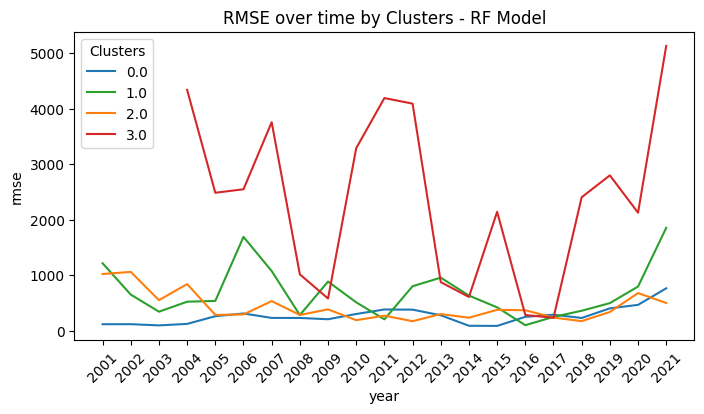

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='year', y='rmse', data = plot_df, ci=None, hue = "kmeans_label", palette=palette)
plt.legend(loc = "upper left", title = "Clusters")
plt.xticks(rotation=45)
plt.title("RMSE over time by Clusters - RF Model")
plt.show()